In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pylab import *
import matplotlib
import plplot
from scipy import stats
#from io import StringIO
print(pd.__version__)
#AttributeError: 'Series' object has no attribute 'to_numpy'
import re

import math
import astropy as astro
import scipy.ndimage as spimage
from astropy.io import fits, ascii
from astropy.table import Table, join
from astropy.cosmology import WMAP9 as cosmo
import matplotlib as mpl
#from numpy import std as biweight_midvariance
import matplotlib.cm as cm

from scipy import optimize
from scipy.stats import gaussian_kde
from matplotlib import colors
import scipy.ndimage as ndimage
from collections import Counter
from matplotlib.legend import Legend
import matplotlib.patches as patches
from matplotlib import pyplot
#
#
#
import extinction


#
# seaborn
#
import pandas.util.testing as tm
import seaborn as sns

#
# Jorge
#

from sel2dhist_xy import sel2dhist_xy


#
# 3D plots!
#
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#biweight_midvariance


import warnings
warnings.simplefilter("ignore")

#
# my_utils
#
from my_utils import *

#
#
#
from ndtest import *
from sklearn.decomposition import PCA

#
#
#
from scipy.optimize import leastsq, fmin
import matplotlib.animation as animation

#
# Carlos Color map
#
from cmaps_CLC import vel_map



1.1.1
1.1.1


<ipython-input-1-ae473d5281b2>:40: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from matplotlib import rcParams as rc
rc.update({'font.size': 20,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 20,\
           'ytick.labelsize' : 20,\
#           'xtick.major.size' : 3.5,\
#           'ytick.major.size' : 3.5,\
           'axes.linewidth'  : 2.0,\
               # Increase the tick-mark lengths (defaults are 4 and 2)
           'xtick.major.size'        :   6,\
           'ytick.major.size'        :   6,\
           'xtick.minor.size'        :   3,\
           'ytick.minor.size'        :   3,\
           'xtick.major.width'       :   1,\
           'ytick.major.width'       :   1,\
           'lines.markeredgewidth'   :   1,\
           'legend.numpoints'        :   1,\
           'xtick.minor.width'       :   1,\
           'ytick.minor.width'       :   1,\
           'legend.frameon'          :   False,\
           'legend.handletextpad'    :   0.3,\
           'font.family'    :   'serif',\
           'mathtext.fontset'        :   'stix',\
           'axes.facecolor' : "w",\
           
          })


READING TABLES

In [1]:
tab_s_MaNGA = ascii.read('tables/s_MaNGA.csv')
tab_s_MaNGA

AttributeError: 'builtin_function_or_method' object has no attribute 'read'

In [2]:
#
# Reading get_proc_elines table!
# 
get_proc_elines="tables/get_proc_elines_MaNGA.clean.csv"
col_proc_elines=header_columns(get_proc_elines,2)
tab_pe=ascii.read(get_proc_elines, delimiter=',', guess=True, comment='\s*#', names=col_proc_elines,\
                      fill_values=[('BAD', np.nan)])

tab_pe=tab_pe[tab_pe['name']==tab_pe['MaNGA_name']]
#print(len(tab_pe_test))
print(tab_pe[tab_pe['name']=='manga-11757-9102'])
#tab_pe.remove_columns(['MaNGA_name'])

#list_columns(tab_pe.columns)

NameError: name 'header_columns' is not defined

In [4]:
print(tab_pe[tab_pe['name']=='manga-11757-9102'])
print(tab_pe[tab_pe['name']=='manga-7979-12703'])
print(tab_pe[tab_pe['name']=='manga-10837-3701'])
print(tab_pe[tab_pe['name']=='manga-11834-9102'])
print(tab_pe[tab_pe['name']=='manga-11941-1902'])
print(tab_pe[tab_pe['name']=='manga-10496-6102'])
print(tab_pe[tab_pe['name']=='manga-11980-6102'])

#manga-11834-9102 

   MaNGA_name    nsa_redshift nsa_u_absmag ... NH_R_ALL_mean NH_R_ALL_error
---------------- ------------ ------------ ... ------------- --------------
manga-11757-9102  0.056329615              ...            --             --
   MaNGA_name    nsa_redshift nsa_u_absmag ...  NH_R_ALL_mean  NH_R_ALL_error
---------------- ------------ ------------ ... --------------- --------------
manga-7979-12703    0.0251824              ... 8.4912609641927           -inf
   MaNGA_name    nsa_redshift ...  NH_R_ALL_mean     NH_R_ALL_error 
---------------- ------------ ... ---------------- -----------------
manga-10837-3701   0.06582478 ... 7.96165325472652 0.217051927962703
   MaNGA_name    nsa_redshift nsa_u_absmag ...  NH_R_ALL_mean    NH_R_ALL_error 
---------------- ------------ ------------ ... --------------- -----------------
manga-11834-9102  0.029348467              ... 7.6989545847112 0.208330140528545
   MaNGA_name    nsa_redshift nsa_u_absmag ... NH_R_ALL_mean NH_R_ALL_error
------------

In [5]:
#
# Reading Mag table
#
get_mag_cubes="tables/get_mag_cubes_v3_1_1_redshift.csv"
col_mag_cubes=header_columns_space(get_mag_cubes,2)
tab_mag=ascii.read(get_mag_cubes, delimiter=',', guess=True, comment='\s*#', names=col_mag_cubes,\
                      fill_values=[('BAD', np.nan)])
#print(tab_pe)
tab_mag.rename_column('name-obj', 'name')
tab_mag.rename_column('R_band_mag', 'RJ_band_mag')
tab_mag.rename_column('R_band_mag_error', 'RJ_band_mag_error')
tab_mag.rename_column('R_band_abs_mag', 'RJ_band_abs_mag')
tab_mag.rename_column('R_band_abs_mag_error', 'RJ_band_abs_mag_error')
list_columns(col_mag_cubes)


print(tab_mag[tab_mag['name']=='manga-11834-9102'])
print(tab_mag[tab_mag['name']=='manga-11941-1902'])


name-obj                   i_band_mag_error           Y_centroid                 SN_at_R50                  
redshift                   i_band_abs_mag             Re                         error_SN_at_R50            
error_redshift             i_band_abs_mag_error       error_Re                   Re1                        
u_band_mag                 B_band_mag                 mean_S/N_at_Re             error_Re1                  
u_band_mag_error           B_band_mag_error           sigma_S/N_at_Re            B-V                        
u_band_abs_mag             B_band_abs_mag             ellipticy                  error_B-V                  
u_band_abs_mag_error       B_band_abs_mag_error       Pa                         B-R                        
g_band_mag                 V_band_mag                 R50                        error_B-R                  
g_band_mag_error           V_band_mag_error           error_R50                  log10_Mass/Msun_phot.      
g_band_abs_mag     

In [6]:
#
# Reading Indices at Re
#
get_ind_Re="tables/get_val_ind_Re_MaNGA.csv"
col_ind_Re=header_columns_space(get_ind_Re,2)
tab_ind_Re=ascii.read(get_ind_Re, delimiter=',', guess=True, comment='\s*#', names=col_ind_Re,\
                      fill_values=[('BAD', np.nan)])
#print(tab_ind_Re)
tab_ind_Re.rename_column('MaNGA_name', 'name')
list_columns(tab_ind_Re.columns)

print(tab_ind_Re[tab_ind_Re['name']=='manga-11834-9102'])
print(tab_ind_Re[tab_ind_Re['name']=='manga-11941-1902'])

name        Mgb         e_Fe5335    Hg          
Hd          e_Mgb       e4000       e_Hg        
e_Hd        Fe5270      e_e4000     SN          
Hb          e_Fe5270    Hdmod       e_SN        
e_Hb        Fe5335      e_Hdmod                 
      name              Hd        ...         SN                 e_SN       
---------------- ---------------- ... ------------------ -------------------
manga-11834-9102 5.36476058515708 ... 0.0350306768884251 0.00489828028869856
      name               Hd        ...         SN               e_SN       
---------------- ----------------- ... ----------------- ------------------
manga-11941-1902 -1.39429852038545 ... 0.128446213761922 0.0240489379700139


In [7]:
#
# Reading Indices at Re
#
get_ind="tables/get_proc_indices_MaNGA.clean.csv"
col_ind=header_columns_space(get_ind,2)
tab_ind=ascii.read(get_ind, delimiter=',', guess=True, comment='\s*#', names=col_ind,\
                      fill_values=[('BAD', np.nan)])
#print(tab_ind_Re)
#tab_ind_Re.rename_column('MaNGA_name', 'name')
list_columns(tab_ind.columns)


MaNGA_name            e_D4000_fit           e_Hb_Re_fit           e_D4000_Re_fit        
nsa_redshift          slope_D4000           Hb_alpha_fit          D4000_alpha_fit       
nsa_u_absmag          e_slope_D4000         e_Hb_alpha_fit        e_D4000_alpha_fit     
nsa_z_absmag          D4000_OH_fit          Mgb_Re_fit            Hdmod_Re_fit          
nsa_u_z_absmag        e_D4000_fit1          e_Mgb_Re_fit          e_Hdmod_Re_fit        
nsa_mstar             slope_D4000_OH        Mgb_alpha_fit         Hdmod_alpha_fit       
nsa_inclination       e_slope_D4000_OH      e_Mgb_alpha_fit       e_Hdmod_alpha_fit     
nsa_petro_th50        Sgas_OH_fit           Fe5270_Re_fit         Hg_Re_fit             
nsa_sersic_ba         e_Sgas_fit            e_Fe5270_Re_fit       e_Hg_Re_fit           
nsa_sersic_n          slope_Sgas_OH         Fe5270_alpha_fit      Hg_alpha_fit          
nsa_sersic_phi        e_slope_Sgas          e_Fe5270_alpha_fit    e_Hg_alpha_fit        
nsa_sersic_th50      

In [8]:
#
# Reading Indices at Re
#
get_Re="tables/get_val_Re_MaNGA.csv"
col_Re=header_columns_space(get_Re,2)
tab_val_Re=ascii.read(get_Re, delimiter=',', guess=True, comment='\s*#', names=col_Re,\
                      fill_values=[('BAD', np.nan)])
#print(tab_ind_Re)
tab_val_Re.rename_column('MaNGA_name', 'name')
list_columns(tab_val_Re.columns)


name                    e_Age_LW                e_disp_Ha               e_ML                    
Sigma_Mass_stars        Age_MW                  vel_Ha                  Sigma_SFR_ssp           
e_Sigma_Mass_stars      e_Age_MW                e_vel_Ha                e_Sigma_SFR_ssp         
Sigma_SFR               OH_t2                   vel_ssp                 Sigma_Mass_gas_rad      
e_Sigma_SFR             e_OH_t2                 e_vel_ssp               e_Sigma_Mass_gas_rad    
Sigma_Mass_gas          OH_O3N2                 SK_ssp                  Lambda                  
e_Sigma_Mass_gas        e_OH_O3N2               e_SK_ssp                e_Lambda                
Sigma_Mass_gas_ssp      Av_gas                  SK_Ha                   OH_ONS                  
e_Sigma_Mass_gas_ssp    e_Av_gas                e_SK_Ha                 e_OH_ONS                
ZH_LW                   Av_ssp                  KIN_ssp                 NO_ONS                  
e_ZH_LW                 e_Av_s

In [9]:
#
# Reading Indices at Re
#
get_in_Re="tables/get_val_within_Re_MaNGA.csv"
col_in_Re=header_columns_space(get_in_Re,2)
tab_val_in_Re=ascii.read(get_in_Re, delimiter=',', guess=True, comment='\s*#', names=col_in_Re,\
                      fill_values=[('BAD', np.nan)])
list_col_names=tab_val_in_Re.columns.copy()
for col_name in list_col_names:
    new_col_name="in_"+col_name
    tab_val_in_Re.rename_column(col_name, new_col_name)
#print(tab_ind_Re)
tab_val_in_Re.rename_column('in_MaNGA_name', 'name')
list_columns(tab_val_in_Re.columns)


name                       in_e_Age_LW                in_e_disp_Ha               in_e_ML                    
in_Sigma_Mass_stars        in_Age_MW                  in_vel_Ha                  in_Sigma_SFR_ssp           
in_e_Sigma_Mass_stars      in_e_Age_MW                in_e_vel_Ha                in_e_Sigma_SFR_ssp         
in_Sigma_SFR               in_OH_t2                   in_vel_ssp                 in_Sigma_Mass_gas_rad      
in_e_Sigma_SFR             in_e_OH_t2                 in_e_vel_ssp               in_e_Sigma_Mass_gas_rad    
in_Sigma_Mass_gas          in_OH_O3N2                 in_SK_ssp                  in_Lambda                  
in_e_Sigma_Mass_gas        in_e_OH_O3N2               in_e_SK_ssp                in_e_Lambda                
in_Sigma_Mass_gas_ssp      in_Av_gas                  in_SK_Ha                   in_OH_ONS                  
in_e_Sigma_Mass_gas_ssp    in_e_Av_gas                in_e_SK_Ha                 in_e_OH_ONS                
in_ZH_LW           

In [10]:
#
# Reading flux_elines_table
#
get_p_fe="tables/get_proc_flux_elines_MaNGA.clean.csv"
col_p_fe=header_columns_space(get_p_fe,2)
tab_fe=ascii.read(get_p_fe, delimiter=',', guess=True, comment='\s*#', names=col_p_fe,\
                      fill_values=[('BAD', np.nan)])
print(len(tab_fe))


tab_fe=tab_fe[tab_fe['name']==tab_fe['MaNGA_name']]
list_columns(tab_fe.columns)
tab_fe.remove_columns(['MaNGA_name'])

#tab_mag.rename_column('name-obj', 'name')

10154
MaNGA_name                          e_flux_HI3889.05_alpha_fit          e_flux_[OIII]5006.84_alpha_fit      e_flux_Halpha6562.85_alpha_fit      
nsa_redshift                        flux_HeI3964.73_Re_fit              flux_HeI5015.68_Re_fit              flux_[NII]6583.45_Re_fit            
nsa_u_absmag                        e_flux_HeI3964.73_Re_fit            e_flux_HeI5015.68_Re_fit            e_flux_[NII]6583.45_Re_fit          
nsa_z_absmag                        flux_HeI3964.73_alpha_fit           flux_HeI5015.68_alpha_fit           flux_[NII]6583.45_alpha_fit         
nsa_u_z_absmag                      e_flux_HeI3964.73_alpha_fit         e_flux_HeI5015.68_alpha_fit         e_flux_[NII]6583.45_alpha_fit       
nsa_mstar                           flux_[NeIII]3967.46_Re_fit          flux_[NI]5197.9_Re_fit              flux_[SII]6716.44_Re_fit            
nsa_inclination                     e_flux_[NeIII]3967.46_Re_fit        e_flux_[NI]5197.9_Re_fit            e_flux_[SII]6716

In [11]:
#
# Reading flux_elines_table
#
get_p_fe_org="tables/get_proc_flux_elines_org_MaNGA.clean.csv"
col_p_fe_org=header_columns_space(get_p_fe_org,2)
tab_fe_org=ascii.read(get_p_fe_org, delimiter=',', guess=True, comment='\s*#', names=col_p_fe_org,\
                      fill_values=[('BAD', np.nan)])
#print(tab_pe)
#tab_mag.rename_column('name-obj', 'name')
#list_columns(col_p_fe_org)
tab_fe_org=tab_fe_org[tab_fe_org['name']==tab_fe_org['MaNGA_name']]
tab_fe_org.remove_columns(['MaNGA_name'])
print(len(tab_fe_org))
list_columns(tab_fe_org.columns)


#tab_mag.rename_column('name-obj', 'name')

10156
nsa_redshift                         EW_[SII]4076_Re_fit                  disp_[OIII]4958_Re_fit               l_flux_[SIII]6312_Ha_Re_fit          
nsa_u_absmag                         e_EW_[SII]4076_Re_fit                e_disp_[OIII]4958_Re_fit             e_l_flux_[SIII]6312_Ha_Re_fit        
nsa_z_absmag                         EW_[SII]4076_alpha_fit               disp_[OIII]4958_alpha_fit            l_flux_[SIII]6312_Ha_alpha_fit       
nsa_u_z_absmag                       e_EW_[SII]4076_alpha_fit             e_disp_[OIII]4958_alpha_fit          e_l_flux_[SIII]6312_Ha_alpha_fit     
nsa_mstar                            EW_Hd4101_Re_fit                     disp_Hb4861_Re_fit                   l_flux_SiII6347_Ha_Re_fit            
nsa_inclination                      e_EW_Hd4101_Re_fit                   e_disp_Hb4861_Re_fit                 e_l_flux_SiII6347_Ha_Re_fit          
nsa_petro_th50                       EW_Hd4101_alpha_fit                  disp_Hb4861_alpha_fit     

In [12]:
#
# Reading flux_elines_table
#
get_p_OH="tables/get_proc_OH_MaNGA.clean.csv"
col_p_OH=header_columns_space(get_p_OH,2)
tab_OH=ascii.read(get_p_OH, delimiter=',', guess=True, comment='\s*#', names=col_p_OH,\
                      fill_values=[('BAD', np.nan)])
#print(tab_pe)

tab_OH=tab_OH[tab_OH['name']==tab_OH['MaNGA_name']]
tab_OH.remove_columns(['MaNGA_name'])
#list_columns(col_p_fe_org)


print(len(tab_OH))
list_columns(tab_OH.columns)


#tab_mag.rename_column('name-obj', 'name')

10242
nsa_redshift                    e_OH_Pet04_O3N2_alpha_fit       OH_Cur20_R2_alpha_fit           e_U_Dors_O32_Re_fit             
nsa_u_absmag                    OH_Kew02_N2O2_Re_fit            e_OH_Cur20_R2_alpha_fit         U_Dors_O32_alpha_fit            
nsa_z_absmag                    e_OH_Kew02_N2O2_Re_fit          OH_Cur20_N2_Re_fit              e_U_Dors_O32_alpha_fit          
nsa_u_z_absmag                  OH_Kew02_N2O2_alpha_fit         e_OH_Cur20_N2_Re_fit            U_Dors_S_Re_fit                 
nsa_mstar                       e_OH_Kew02_N2O2_alpha_fit       OH_Cur20_N2_alpha_fit           e_U_Dors_S_Re_fit               
nsa_inclination                 OH_Pil10_ONS_Re_fit             e_OH_Cur20_N2_alpha_fit         U_Dors_S_alpha_fit              
nsa_petro_th50                  e_OH_Pil10_ONS_Re_fit           OH_Cur20_R23_Re_fit             e_U_Dors_S_alpha_fit            
nsa_sersic_ba                   OH_Pil10_ONS_alpha_fit          e_OH_Cur20_R23_Re_fit      

In [13]:
#
# Reading morphological table
#
#morph={'-2':'CD','-1':'E','0':'S0','1':'Sa','2':'Sab','3':'Sb','4':'Sbc','5':'Sc','6':'Scd',\
#       '7':'Sd','8':'Sdm','9':'Sm','10':'Irr'}
morph={-2:'CD',-1:'E',0:'S0',1:'Sa',2:'Sab',3:'Sb',4:'Sbc',5:'Sc',6:'Scd',\
       7:'Sd',8:'Sdm',9:'Sm',10:'Irr'}
morph_file="tables/manga-morphall-v3_1_1.fits"
tab_morph = Table.read(morph_file, format='fits')
tab_morph.rename_column('index', 'name')
tab_morph.rename_column('nsa_sersic_n', 'nsa_sersic_n_morph')
tab_morph.rename_column('best type_n','best_type_n')
tab_morph.rename_column('best type','best_type')

list_columns(tab_morph.columns)
print(morph)


name                  r-i                   P(Sab)                P(Sm)                 
nsa_sersic_n_morph    i-z                   P(Sb)                 P(Irr)                
log_Mass_corr         C (R50/R90)           P(Sbc)                best_type_n           
rat_vel_sigma         P(CD)                 P(Sc)                 best_type             
Ellipticity           P(E)                  P(Scd)                                      
u-g                   P(S0)                 P(Sd)                                       
g-r                   P(Sa)                 P(Sdm)                                      
{-2: 'CD', -1: 'E', 0: 'S0', 1: 'Sa', 2: 'Sab', 3: 'Sb', 4: 'Sbc', 5: 'Sc', 6: 'Scd', 7: 'Sd', 8: 'Sdm', 9: 'Sm', 10: 'Irr'}


In [14]:
drpall='tables/drpall-v3_1_1.fits'
tab_dr = Table.read(drpall, format='fits')
tab_dr['name']=tab_dr['plateifu']
for indx,val in enumerate(tab_dr['name']):
    tab_dr['name'][indx]='manga-'+tab_dr['name'][indx]
list_columns(tab_dr.columns)
print(tab_dr['name'])

plate                    cartid                   manga_tileid             nsa_nsaid                
ifudsgn                  designid                 nsa_iauname              nsa_nsaid_v1b            
plateifu                 cenra                    ifudesignsize            nsa_z                    
mangaid                  cendec                   ifutargetsize            nsa_zdist                
versdrp2                 airmsmin                 ifudesignwrongsize       nsa_sersic_absmag        
versdrp3                 airmsmed                 z                        nsa_elpetro_absmag       
verscore                 airmsmax                 zmin                     nsa_elpetro_amivar       
versutil                 seemin                   zmax                     nsa_sersic_mass          
versprim                 seemed                   szmin                    nsa_elpetro_mass         
platetyp                 seemax                   szmax                    nsa_elpetro_ba  

In [15]:
vol_file="tables/MaNGA_MPL11_Volume_C.fits"
tab_vol = Table.read(vol_file, format='fits')
tab_vol['name']=tab_vol['plateifu']
for indx,val in enumerate(tab_vol['name']):
    name_now='manga-'+tab_vol['name'][indx]
    name_now=name_now.replace(" ","")
    tab_vol['name'][indx]=name_now
    

print(tab_vol['name'],tab_vol['Vmax_w'])
list_columns(tab_vol.columns)


       name      
-----------------
manga-10001-12701
manga-10001-12702
manga-10001-12703
manga-10001-12704
manga-10001-12705
 manga-10001-1901
 manga-10001-1902
 manga-10001-3701
 manga-10001-3702
 manga-10001-3703
              ...
 manga-9894-12705
  manga-9894-1902
  manga-9894-3701
  manga-9894-3703
  manga-9894-3704
  manga-9894-6101
  manga-9894-6102
  manga-9894-6103
  manga-9894-6104
  manga-9894-9101
  manga-9894-9102
Length = 9341 rows    Vmax_w  
-----------
 4.2211e-06
 3.7132e-06
1.93554e-06
1.68639e-06
1.93554e-06
8.71277e-06
  7.905e-06
6.45567e-07
 5.6706e-06
2.38905e-06
        ...
7.56699e-06
1.13259e-05
4.09177e-06
 2.7185e-06
7.29204e-07
1.66874e-06
1.26995e-05
1.26995e-05
2.05023e-06
 8.6621e-08
8.28911e-06
Length = 9341 rows
plate        mangaid      logMs_nsa    Num_w        
ifudsgn      nsa_nsaid    z_obs_nsa    name         
plateifu     nsaid        Vmax_w                    


In [16]:
get_QC="tables/QC_MaNGA_v3_1_1.clean.csv"
col_QC=header_columns_space(get_QC,2)
tab_QC=ascii.read(get_QC, delimiter=',', guess=True, comment='\s*#', names=col_QC,\
                      fill_values=[('BAD', np.nan)])
print(len(tab_QC))
list_columns(tab_QC.columns)





10243
name      QCFLAG    


In [65]:
# ********************** 9.12.2021
# Correct ZH_LW_Re
#
tab_pe['ZH_LW_Re_fit']=tab_pe['ZH_LW_Re']      

In [66]:
#
# Joininig all tables
#
tab_mag['u-i']=tab_mag['u_band_mag']-tab_mag['i_band_mag']
tab_pe.remove_columns(['nsa_u_absmag','nsa_z_absmag', 'nsa_u_z_absmag'])
tab_all=join(tab_pe,tab_mag,keys=['name'],join_type='left')
print("get_proc and get_mag joint")
tab_all=join(tab_all,tab_morph,keys=['name'],join_type='left')
print("... morph added")
tab_all=join(tab_all,tab_dr,keys=['name'],join_type='left')
print("... DR added")
tab_fe.remove_columns(['nsa_u_absmag','nsa_z_absmag', 'nsa_u_z_absmag'])
tab_fe.remove_columns(['nsa_petro_th50', 'nsa_sersic_ba', 'nsa_sersic_n',\
                       'nsa_sersic_phi','nsa_sersic_th50'])
tab_all=join(tab_all,tab_fe,keys=['name'],join_type='left')
print("... flux_elines_long added")
tab_fe_org.remove_columns(['nsa_u_absmag','nsa_z_absmag', 'nsa_u_z_absmag'])
tab_fe_org.remove_columns(['nsa_petro_th50', 'nsa_sersic_ba', 'nsa_sersic_n',\
                           'nsa_sersic_phi','nsa_sersic_th50'])
tab_all=join(tab_all,tab_fe_org,keys=['name'],join_type='left')
print("... flux_elines org added")
tab_OH.remove_columns(['nsa_petro_th50', 'nsa_sersic_ba', 'nsa_sersic_n',\
                       'nsa_sersic_phi','nsa_sersic_th50','nsa_redshift', 'nsa_u_absmag',\
                       'nsa_z_absmag', 'nsa_u_z_absmag', 'nsa_mstar', 'nsa_inclination'])
tab_all=join(tab_all,tab_OH,keys=['name'],join_type='left')
print("... OH added")
tab_all=join(tab_all,tab_ind_Re,keys=['name'],join_type='left')
print("... Indices at Re added")
tab_ind.remove_columns(['nsa_petro_th50', 'nsa_sersic_ba', 'nsa_sersic_n',\
                       'nsa_sersic_phi','nsa_sersic_th50','nsa_redshift', 'nsa_u_absmag',\
                       'nsa_z_absmag', 'nsa_u_z_absmag', 'nsa_mstar', 'nsa_inclination'])
tab_all=join(tab_all,tab_ind,keys=['name'],join_type='left')
print("... Indices fitted added")
tab_all=join(tab_all,tab_val_Re,keys=['name'],join_type='left')
print("... Values at Re added")
tab_all=join(tab_all,tab_val_in_Re,keys=['name'],join_type='left')
print("... Values in Re added")
tab_vol.remove_columns(['plate','ifudsgn', 'plateifu'])

tab_all=join(tab_all,tab_vol,keys=['name'],join_type='right')    
print("... Values of volume added")

tab_all=join(tab_all,tab_QC,keys=['name'],join_type='right')    
print("... Values of QC added")
tab_all.rename_column('log10_Mass/Msun_phot.','log_Mass_phot')
tab_all.rename_column('error_Mass_phot.','e_log_Mass_phot')
#tab_all([data[n].filled(np.nan) for n in data.colnames])


get_proc and get_mag joint
... morph added
... DR added
... flux_elines_long added
... flux_elines org added
... OH added
... Indices at Re added
... Indices fitted added
... Values at Re added
... Values in Re added
... Values of volume added
... Values of QC added


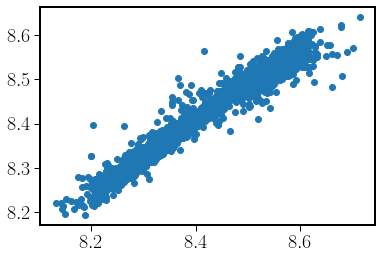

In [67]:
# Just a test!
plt.scatter(tab_all['OH_Re_fit_O3N2'],tab_all['OH_Mar13_O3N2_Re_fit']) 

In [68]:
#print(tab_pe.columns)
for cols in (tab_pe.columns):
    tab_pe[cols].units=''
    tab_pe[cols].description=''
#print(tab_pe[tab_pe['name']=='manga-11757-9102'])

tab_pe_select=tab_pe['name','lSFR','z_gas','z_stars','FoV','nx','ny','Re_kpc','log_Mass_corr','error_Mass','e_lSFR','log_age_mean_LW','s_log_age_mean_LW','log_ZH_mean_LW','s_log_ZH_mean_LW','Av_ssp_stats_mean','Av_ssp_stats_stddev','Av_w1','e_Av_w','log_Mass','log_SFR_ssp','log_NII_Ha_cen_mean','log_NII_Ha_cen_stddev','log_OIII_Hb_cen_mean','log_OIII_Hb_cen_stddev','log_SII_Ha_cen_mean','log_SII_Ha_cen_stddev','log_OII_Hb_cen_mean','log_OII_Hb_cen_stddev','EW_Ha_cen_mean','EW_Ha_cen_stddev','ZH_LW_Re_fit','e_ZH_LW_Re_fit','alpha_ZH_LW_Re_fit','e_alpha_ZH_LW_Re_fit','ZH_MW_Re_fit','e_ZH_MW_Re_fit','alpha_ZH_MW_Re_fit','e_alpha_ZH_MW_Re_fit','Age_LW_Re_fit','e_Age_LW_Re_fit','alpha_Age_LW_Re_fit','e_alpha_Age_LW_Re_fit','Age_MW_Re_fit','e_Age_MW_Re_fit','alpha_Age_MW_Re_fit','e_alpha_Age_MW_Re_fit','Re_arc','DL','DA','P.A.','Ellipticity','Inclination','elip_ab','log_Mass_gas','rat_vel_sigma','e_rat_vel_sigma','log_SFR_SF','log_SFR_D_C','OH_O3N2_cen','e_OH_O3N2_cen','OH_N2_cen','e_OH_N2_cen','OH_ONS_cen','e_OH_ONS_cen','OH_R23_cen','e_OH_R23_cen','OH_pyqz_cen','e_OH_pyqz_cen','OH_t2_cen','e_OH_t2_cen','OH_M08_cen','e_OH_M08_cen','OH_T04_cen','e_OH_T04_cen','OH_dop_cen','e_OH_dop_cen','OH_O3N2_EPM09_cen','e_OH_O3N2_EPM09_cen','log_OI_Ha_cen','e_log_OI_Ha_cen','Ha_Hb_cen','e_Ha_Hb_cen','log_NII_Ha_Re','e_log_NII_Ha_Re','log_OIII_Hb_Re','e_log_OIII_Hb_Re','log_SII_Ha_Re','e_log_SII_Ha_Re','log_OII_Hb_Re','e_log_OII_Hb_Re','log_OI_Ha_Re','e_log_OI_Ha_Re','EW_Ha_Re','e_EW_Ha_Re','Ha_Hb_Re','e_Ha_Hb_Re','log_NII_Ha_ALL','e_log_NII_Ha_ALL','log_OIII_Hb_ALL','e_log_OIII_Hb_ALL','log_SII_Ha_ALL','e_log_SII_Ha_ALL','log_OII_Hb_ALL','e_log_OII_Hb_ALL','log_OI_Ha_ALL','e_log_OI_Ha_ALL','EW_Ha_ALL','e_EW_Ha_ALL','Ha_Hb_ALL','Sigma_Mass_cen','e_Sigma_Mass_cen','Sigma_Mass_Re','e_Sigma_Mass_Re','Sigma_Mass_ALL','e_Sigma_Mass_ALL','T30','ZH_T30','ZH_Re_T30','a_ZH_T30','T40','ZH_T40','ZH_Re_T40','a_ZH_T40','T50','ZH_T50','ZH_Re_T50','a_ZH_T50','T60','ZH_T60','ZH_Re_T60','a_ZH_T60','T70','ZH_T70','ZH_Re_T70','a_ZH_T70','T80','ZH_T80','ZH_Re_T80','a_ZH_T80','T90','ZH_T90','ZH_Re_T90','a_ZH_T90','T95','ZH_T95','ZH_Re_T95','a_ZH_T95','T99','ZH_T99','ZH_Re_T99','a_ZH_T99','log_Mass_gas_Av_gas_OH','log_Mass_gas_Av_ssp_OH','vel_ssp_2','e_vel_ssp_2','vel_Ha_2','e_vel_Ha_2','vel_ssp_1','e_vel_ssp_1','vel_Ha_1','e_vel_Ha_1','log_SFR_ssp_100Myr','log_SFR_ssp_10Myr','vel_disp_Ha_cen','vel_disp_ssp_cen','vel_disp_Ha_1Re','vel_disp_ssp_1Re','vel_disp_Ha_1Re_mean','vel_disp_ssp_1Re_mean','KIN_Ha_1','e_KIN_Ha_1','KIN_ssp_1','e_KIN_ssp_1','KIN_Ha_05','e_KIN_Ha_05','KIN_ssp_05','e_KIN_ssp_05','log_Mass_in_Re','ML_int','ML_avg','F_Ha_cen','e_F_Ha_cen','Re_kpc_Mass','R50_kpc_V','e_R50_kpc_V','R50_kpc_Mass','e_R50_kpc_Mass','log_Mass_corr_in_R50_V','e_log_Mass_corr_in_R50_V','log_Mass_gas_Av_gas_log_log']

print(tab_pe_select[tab_pe_select['name']=='manga-11834-9102'])
print(tab_pe_select[tab_pe_select['name']=='manga-11941-1902'])
#print(tab_all_select[tab_all_select['name']=='manga-11834-9102'])
#print(tab_pe_select[tab_pe_select['name']=='manga-11757-9102'])

tab_pe_select.rename_column('lSFR','log_SFR_Ha')
tab_pe_select.rename_column('e_lSFR','e_log_SFR_Ha')
tab_pe_select.rename_column('log_NII_Ha_cen_mean','log_NII_Ha_cen')
tab_pe_select.rename_column('log_NII_Ha_cen_stddev','e_log_NII_Ha_cen')  
tab_pe_select.rename_column('log_OIII_Hb_cen_mean','log_OIII_Hb_cen')
tab_pe_select.rename_column('log_OIII_Hb_cen_stddev','e_log_OIII_Hb_cen')
tab_pe_select.rename_column('log_SII_Ha_cen_mean','log_SII_Ha_cen')
tab_pe_select.rename_column('log_SII_Ha_cen_stddev','e_log_SII_Ha_cen')
tab_pe_select.rename_column('log_OII_Hb_cen_mean','log_OII_Hb_cen')
tab_pe_select.rename_column('log_OII_Hb_cen_stddev','e_log_OII_Hb_cen')
tab_pe_select.rename_column('EW_Ha_cen_mean','EW_Ha_cen')
tab_pe_select.rename_column('EW_Ha_cen_stddev','e_EW_Ha_cen')
tab_pe_select.rename_column('rat_vel_sigma','vel_sigma_Re')# float64  
tab_pe_select.rename_column('e_rat_vel_sigma','e_vel_sigma_Re')# float64  

tab_pe_select.remove_column('log_age_mean_LW')
tab_pe_select.remove_column('s_log_age_mean_LW')
tab_pe_select.remove_column('log_ZH_mean_LW')
tab_pe_select.remove_column('s_log_ZH_mean_LW')
tab_pe_select.remove_column('Av_ssp_stats_mean')
tab_pe_select.remove_column('Av_ssp_stats_stddev')
tab_pe_select.remove_column('Av_w1') 
tab_pe_select.remove_column('e_Av_w')
tab_pe_select.remove_column('elip_ab')
tab_pe_select.remove_column('Inclination')
tab_pe_select.remove_column('z_gas')# float64  
tab_pe_select.remove_column('z_stars')# float64  
tab_pe_select.remove_column('nx')# int64  
tab_pe_select.remove_column('ny')# int64  
tab_pe_select.remove_column('log_Mass_corr')# float64  
tab_pe_select.remove_column('vel_disp_Ha_1Re_mean') #float64  
tab_pe_select.remove_column('vel_disp_ssp_1Re_mean')# float64  
tab_pe_select.remove_column('KIN_Ha_1')# float64  
tab_pe_select.remove_column('e_KIN_Ha_1')# float64  
tab_pe_select.remove_column('KIN_ssp_1')# float64  
tab_pe_select.remove_column('e_KIN_ssp_1')# float64  
tab_pe_select.remove_column('KIN_Ha_05')# float64  
tab_pe_select.remove_column('e_KIN_Ha_05')# float64  
tab_pe_select.remove_column('KIN_ssp_05')# float64  
tab_pe_select.remove_column('e_KIN_ssp_05')# float64 
tab_pe_select.remove_column('Re_kpc_Mass')


tab_pe_select.rename_column('error_Mass','e_log_Mass')# float64  

tab_val_select=tab_val_Re['name','Av_gas','e_Av_gas','Av_ssp','e_Av_ssp','Lambda','e_Lambda']
tab_pe_select=join(tab_pe_select,tab_val_select,keys=['name'],join_type='left')
tab_pe_select.rename_column('Lambda','Lambda_Re')
tab_pe_select.rename_column('e_Lambda','e_Lambda_Re')
tab_pe_select.rename_column('Av_gas','Av_gas_Re')
tab_pe_select.rename_column('e_Av_gas','e_Av_gas_Re')
tab_pe_select.rename_column('Av_ssp','Av_ssp_Re')
tab_pe_select.rename_column('e_Av_ssp','e_Av_ssp_Re')
tab_pe_select.rename_column('P.A.','PA')
tab_pe_select.rename_column('Ellipticity','ellip')                                                 
for cols in (tab_pe_select.columns):
    tab_pe_select[cols].units=''
    tab_pe_select[cols].description=''

tab_pe_info = ascii.read("tables/get_proc_elines_MaNGA.select.txt",delimiter=',', guess=True)#, fill_values=" ")  
for cols in (tab_pe_select.columns):
    mask = (tab_pe_info['NAME']==cols)
    tab_tmp=tab_pe_info['DESC'][mask]
    if(len(list(tab_tmp))>0):
        desc_now=list(tab_tmp)[0]
        tab_tmp=tab_pe_info['UNITS'][mask]
        units_now=list(tab_tmp)[0]
        #print(cols,',',units_now,',',desc_now)
        tab_pe_select[cols].units=units_now
        tab_pe_select[cols].description=desc_now

        
for cols in (tab_pe_select.columns):
    #
    # Oxygen abundances
    #
    if (cols.find("OH")>-1):
        tab_pe_select[cols].units='dex'
        if (cols.find("alpha")>-1):
            if (cols.find("e_OH")>-1):
                cal=cols.replace('e_OH_','')
                cal=cal.replace('_alpha_fit','')            
                tab_pe_select[cols].description='Error in the slope of the O/H gradient using the calibrator '+cal
            else:
                cal=cols.replace('OH_','')
                cal=cal.replace('_alpha_fit','')
                tab_pe_select[cols].description='Slope of the O/H gradient using the calibrator '+cal
        else:
            if (cols.find("e_OH")>-1):
                cal=cols.replace('e_OH_','')
                cal=cal.replace('_cen','')            
                tab_pe_select[cols].description='Error in Oxygen abundance using the calibrator '+cal+' at the central region'
            else:
                cal=cols.replace('OH_','')
                cal=cal.replace('_cen','')            
                tab_pe_select[cols].description='Oxygen abundance using the calibrator '+cal+' at the central region'
  
#print(tab_pe_select['name'].description)
#print(tab_pe_select['name'].units)
#print(tab_pe_info['UNITS'])

#print(tab_pe_select)

      name              lSFR       ... log_Mass_gas_Av_gas_log_log
---------------- ----------------- ... ---------------------------
manga-11834-9102 0.498134028312377 ...            9.66524002259877
      name              lSFR       ... log_Mass_gas_Av_gas_log_log
---------------- ----------------- ... ---------------------------
manga-11941-1902 -1.15274386398585 ...                       -12.0


In [69]:
###################################################
# tab_pe_select
###################################################
for cols in (tab_pe_select.columns):
    data_type=np.array(tab_pe_select[cols][0])
#    print(cols,data_type.dtype,tab_pe_select[cols].units,tab_pe_select[cols].description)
print(tab_pe_select['OH_O3N2_cen'].units)
    


dex


In [70]:
list_ind=['name']
for cols in (tab_ind.columns):
    if (cols.find("fit")>-1):
        if (cols.find("SN")==-1):
            list_ind.append(cols)

list_ind.remove('D4000_Re_fit')
list_ind.remove('e_D4000_fit')
list_ind.remove('D4000_OH_fit')
list_ind.remove('e_D4000_fit1')
list_ind.remove('Sgas_OH_fit')
list_ind.remove('e_Sgas_fit')
tab_ind_select=tab_ind[list_ind]
#print(list_ind)
                       

In [71]:
##################################################################################
#
# tab_fe metadata
#
##################################################################################

for cols in (tab_fe.columns):
    tab_fe[cols].units=''
    tab_fe[cols].description=''
    if (cols.find("flux")>-1):
        tab_fe[cols].units='10^-16 erg/s/cm^2'
        a_text=cols.split("_")
        if (cols.find("e_flux")>-1):
            tab_fe[cols].description='Error in the flux intensity of line '+a_text[2]+" at 1Re"
        else:
            tab_fe[cols].description='Flux intensity of line '+a_text[1]+" at 1Re"
#    print(cols,tab_fe[cols][0].dtype,tab_fe[cols].units,tab_fe[cols].description)
#    print(cols)

##################################################################################
#
# tab_OH metadata
#
##################################################################################
for cols in (tab_OH.columns):
    tab_OH[cols].units=''
    tab_OH[cols].description=''
    #
    # Oxygen abundances
    #
    if (cols.find("OH")>-1):
        tab_OH[cols].units='dex'
        if (cols.find("alpha")>-1):
            if (cols.find("e_OH")>-1):
                cal=cols.replace('e_OH_','')
                cal=cal.replace('_alpha_fit','')            
                tab_OH[cols].description='Error in the slope of the O/H gradient using the calibrator '+cal
            else:
                cal=cols.replace('OH_','')
                cal=cal.replace('_alpha_fit','')
                tab_OH[cols].description='Slope of the O/H gradient using the calibrator '+cal
        else:
            if (cols.find("e_OH")>-1):
                cal=cols.replace('e_OH_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='Error in Oxygen abundance using the calibrator '+cal+' at 1Re'
            else:
                cal=cols.replace('OH_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='Oxygen abundance using the calibrator '+cal+' at 1Re'
    #
    # NH
    #
    if (cols.find("NH")>-1):
        tab_OH[cols].units='dex'
        if (cols.find("alpha")>-1):
            if (cols.find("e_NH")>-1):
                cal=cols.replace('e_NH_','')
                cal=cal.replace('_alpha_fit','')            
                tab_OH[cols].description='Error in the slope of the N/H gradient using the calibrator '+cal
            else:
                cal=cols.replace('NH_','')
                cal=cal.replace('_alpha_fit','')
                tab_OH[cols].description='Slope of the N/H gradient using the calibrator '+cal
        else:
            if (cols.find("e_NH")>-1):
                cal=cols.replace('e_NH_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='Error in Nitrogen abundance using the calibrator '+cal+' at 1Re'
            else:
                cal=cols.replace('NH_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='Nitrogen abundance using the calibrator '+cal+' at 1Re'
    #
    # NO
    #
    if (cols.find("NO")>-1):
        tab_OH[cols].units='dex'
        if (cols.find("alpha")>-1):
            if (cols.find("e_NO")>-1):
                cal=cols.replace('e_NO_','')
                cal=cal.replace('_alpha_fit','')            
                tab_OH[cols].description='Error in the slope of the N/O gradient using the calibrator '+cal
            else:
                cal=cols.replace('NO_','')
                cal=cal.replace('_alpha_fit','')
                tab_OH[cols].description='Slope of the N/O gradient using the calibrator '+cal
        else:
            if (cols.find("e_NO")>-1):
                cal=cols.replace('e_NO_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='Error in N/O abundance using the calibrator '+cal+' at 1Re'
            else:
                cal=cols.replace('NO_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='N/O abundance using the calibrator '+cal+' at 1Re'
    #
    # U
    #
    if (cols.find("U_")>-1):
        tab_OH[cols].units='dex'
        if (cols.find("alpha")>-1):
            if (cols.find("e_U")>-1):
                cal=cols.replace('e_U_','')
                cal=cal.replace('_alpha_fit','')            
                tab_OH[cols].description='Error in the slope of the log(U) gradient using the calibrator '+cal
            else:
                cal=cols.replace('U_','')
                cal=cal.replace('_alpha_fit','')
                tab_OH[cols].description='Slope of the log(U) gradient using the calibrator '+cal
        else:
            if (cols.find("e_U_")>-1):
                cal=cols.replace('e_U_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='Error in log(U) using the calibrator '+cal+' at 1Re'
            else:
                cal=cols.replace('U_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='log(U), ionization parameter using the calibrator '+cal+' at 1Re'
    #
    # Ne
    #
    if (cols.find("Ne_")>-1):
        tab_OH[cols].units='dex'
        if (cols.find("alpha")>-1):
            if (cols.find("e_Ne")>-1):
                cal=cols.replace('e_Ne_','')
                cal=cal.replace('_alpha_fit','')            
                tab_OH[cols].description='Error in the slope of n_e gradient using the '+cal+' estimator'
            else:
                cal=cols.replace('Ne_','')
                cal=cal.replace('_alpha_fit','')
                tab_OH[cols].description='Slope of the n_e gradient using the '+cal+' estimator'
        else:
            if (cols.find("e_Ne_")>-1):
                cal=cols.replace('e_Ne_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='Error in n_e using the '+cal+' estimator at 1Re'
            else:
                cal=cols.replace('Ne_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='n_e, electron density using the '+cal+' estimator at 1Re'
#    print(cols,tab_OH[cols][0].dtype,tab_OH[cols].units,tab_OH[cols].description)

##################################################################################
#
# tab_ind metadata
#
##################################################################################

for cols in (tab_ind_select.columns):
    tab_ind_select[cols].units=''
    tab_ind_select[cols].description=''
    if (cols.find("_")>-1):
        tab_ind_select[cols].units='Angstrom'
        if (cols.find("D4000")>-1):
            tab_ind_select[cols].units=''
        if (cols.find("SN")>-1):
            tab_ind_select[cols].units=''
        if (cols.find("alpha")>-1):
            tab_ind_select[cols].units=''
            if (cols[0]=="e"):
                cal=cols.replace('e_','')
                cal=cal.replace('_alpha_fit','')            
                tab_ind_select[cols].description='Error in the slope of the gradient of the '+cal+' index'
            else:
                cal=cols.replace('e_','')
                cal=cal.replace('_alpha_fit','')
                tab_ind_select[cols].description='Slope of the gradient of the '+cal+' index'
        else:
            if (cols[0]=="e"):
                cal=cols.replace('e_','')
                cal=cal.replace('_Rfit','')            
                tab_ind_select[cols].description='Error of the '+cal+' stellar index at 1Re'
            else:
                cal=cols.replace('OH_','')
                cal=cal.replace('_Re_fit','')            
                tab_ind_select[cols].description='Value of the '+cal+' stellar index at 1Re'
#        print(cols,tab_ind_select[cols][0].dtype,tab_ind_select[cols].units,tab_ind_select[cols].description)
##################################################################################
#
# tab_mag metadata
#
##################################################################################
tab_mag_info = ascii.read("tables/get_mag_cubes_v3_1_1.txt",delimiter=',', guess=True)  
list_mag=list(tab_mag_info['NAME'])
tab_mag_select=tab_mag[list_mag]
for cols in (tab_mag_select.columns):
    mask = (tab_mag_info['NAME']==cols)
    tab_tmp=tab_mag_info['DESC'][mask]
    if(len(list(tab_tmp))>0):
        desc_now=list(tab_tmp)[0]
        tab_tmp=tab_mag_info['UNITS'][mask]
        units_now=list(tab_tmp)[0]
        tab_mag_select[cols].units=units_now
        tab_mag_select[cols].description=desc_now
tab_mag_select.rename_column('log10_Mass/Msun_phot.','log_Mass_phot')
tab_mag_select.rename_column('error_Mass_phot.','e_log_Mass_phot')
        
#for cols in (tab_mag_select.columns):
#    print(cols,tab_mag_select[cols][0].dtype,tab_mag_select[cols].units,tab_mag_select[cols].description)          #tab_all_select=join(tab_all_select,tab_mag,keys=['name'],join_type='left')

##################################################################################
#
# tab_morph metadata
#
##################################################################################
tab_morph_info = ascii.read("tables/get_morh.txt",delimiter=',', guess=True)  
list_morph=list(tab_morph_info['NAME'])
tab_morph_select=tab_morph[list_morph]
for cols in (tab_morph_select.columns):
    mask = (tab_morph_info['NAME']==cols)
    tab_tmp=tab_morph_info['DESC'][mask]
    if(len(list(tab_tmp))>0):
        desc_now=list(tab_tmp)[0]
        tab_tmp=tab_morph_info['UNITS'][mask]
        units_now=list(tab_tmp)[0]
        tab_morph_select[cols].units=units_now
        tab_morph_select[cols].description=desc_now
#tab_all_select=join(tab_all_select,tab_morph,keys=['name'],join_type='left')

##################################################################################
#
# tab_vol metadata
#
##################################################################################
tab_vol_info = ascii.read("tables/get_vol.txt",delimiter=',', guess=True)  
list_vol=list(tab_vol_info['NAME'])
tab_vol_select=tab_vol[list_vol]
for cols in (tab_vol_select.columns):
    mask = (tab_vol_info['NAME']==cols)
    tab_tmp=tab_vol_info['DESC'][mask]
    if(len(list(tab_tmp))>0):
        desc_now=list(tab_tmp)[0]
        tab_tmp=tab_vol_info['UNITS'][mask]
        units_now=list(tab_tmp)[0]    
        tab_vol_select[cols].units=units_now
        tab_vol_select[cols].description=desc_now
#for cols in (tab_vol_select.columns):
#    data_type=np.array(tab_vol_select[cols][0])
#    print(cols,data_type.dtype,tab_vol_select[cols].units,tab_vol_select[cols].description)


tab_QC['name'].units=''
tab_QC['name'].description='manga-plate-ifudsgn unique name'
tab_QC['QCFLAG'].units=''
tab_QC['QCFLAG'].description='QC flat 0=good 2=bad >2 warning'
for cols in (tab_QC.columns):
#    tab_QC[cols].units=''
#    tab_QC[cols].description=''  
    data_type=np.array(tab_QC[cols][0])
    print(cols,data_type.dtype,tab_QC[cols].units,tab_QC[cols].description)

print(tab_pe_select['OH_O3N2_cen'].units)
   
#tab_all_select=join(tab_all_select,tab_vol,keys=['name'],join_type='left')
#tab_all_select=join(tab_all_select,tab_QC,keys=['name'],join_type='left')

name <U17  manga-plate-ifudsgn unique name
QCFLAG int64  QC flat 0=good 2=bad >2 warning
dex


In [89]:
#
# Create hypertable FITS
#Pipe3D_HDU = pyfits.PrimaryHDU()
hdu_SSP_in =fits.open('tables/MaStar_CB19.slog_1_5.fits.gz')
hdu_SSP = fits.ImageHDU(data=hdu_SSP_in[0].data,header=hdu_SSP_in[0].header)
hdu_SSP.name='MaSTAR_CB19_SSP'
#print(hdu_SSP)
hdu_pe = fits.BinTableHDU(tab_pe)
hdu_pe.name='CHAR_VALUES'
hdu_fe = fits.BinTableHDU(tab_fe)
hdu_fe.name='FLUX_ELINES'
hdu_OH = fits.BinTableHDU(tab_OH)
hdu_OH.name='OXYGEN_ABUNDANCES'
hdu_ind = fits.BinTableHDU(tab_ind_select)
hdu_ind.name='STELLAR_INDICES'
hdu_val_Re = fits.BinTableHDU(tab_val_Re)
hdu_val_Re.name='VALUES_AT_RE'
hdu_mag = fits.BinTableHDU(tab_mag)
hdu_mag.name='PHOTOMETRY'
hdu_morph = fits.BinTableHDU(tab_morph)
hdu_morph.name='MORPHOLOGY'
hdu_vol = fits.BinTableHDU(tab_vol)
hdu_vol.name='VOLUME_CORR'
hdr = fits.Header()
hdr['AUTHOR'] = 'S.F.Sanchez and IA-MANGA'
hdr['VERSION'] = 'v3.1.1'
hdr['DATE'] = '2021-12-14'
hdr['COMMENT'] = "Pipe3D characteristics and integrated properties."
empty_primary = fits.PrimaryHDU(header=hdr)
hdu_list =fits.HDUList([empty_primary,hdu_pe,hdu_fe,hdu_OH,hdu_ind,hdu_val_Re,hdu_mag,hdu_morph,hdu_vol,hdu_SSP])
hdu_list.writeto('SDSS17Pipe3D_v3_1_1.ext.fits',overwrite=True)

#hdu_mag = fits.BinTableHDU(tab_mag)


#hdu_list = fits.HDUList()
#hdu_list.append(hdu_pe)

#hdulist=fits.HDUList([primhdu])
#hdu_pe.writeto('test.fits')
#primhdu = fits.PrimaryHDU(data=hdu_pe.data,header=hdu_pe.header)

print(tab_pe_select['OH_O3N2_cen'].units)
#print(hdu_pe)

dex


Text(0, 0.5, 'vel disp Ha')

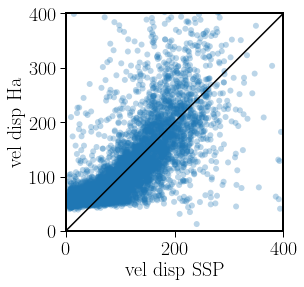

In [108]:
#vel_disp_ssp_cen
mask_now=tab_pe['vel_disp_Ha_cen']>0

fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(tab_pe['vel_disp_ssp_cen'][mask_now],tab_pe['vel_disp_Ha_cen'][mask_now],alpha=0.3,edgecolor='none')
plt.plot([np.min(tab_pe['vel_disp_ssp_cen']),np.max(tab_pe['vel_disp_ssp_cen'])],[np.min(tab_pe['vel_disp_ssp_cen']),np.max(tab_pe['vel_disp_ssp_cen'])],color='black')
ax.set_xlim(0,400)
ax.set_ylim(0,400)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('vel disp SSP')
ax.set_ylabel('vel disp Ha')

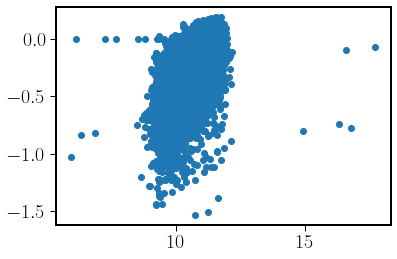

In [90]:
plt.scatter(tab_pe_select['log_Mass'],tab_pe_select['ZH_LW_Re_fit'])

In [91]:
list_columns(tab_pe_select.columns,1)

# ********************** 9.12.2021
# Correct ZH_LW_Re
#
#tab_pe_select['ZH_LW_Re_fit']=tab_pe_select['ZH_LW_Re']      

name                           
log_SFR_Ha                     
FoV                            
Re_kpc                         
e_log_Mass                     
e_log_SFR_Ha                   
log_Mass                       
log_SFR_ssp                    
log_NII_Ha_cen                 
e_log_NII_Ha_cen               
log_OIII_Hb_cen                
e_log_OIII_Hb_cen              
log_SII_Ha_cen                 
e_log_SII_Ha_cen               
log_OII_Hb_cen                 
e_log_OII_Hb_cen               
EW_Ha_cen                      
e_EW_Ha_cen                    
ZH_LW_Re_fit                   
e_ZH_LW_Re_fit                 
alpha_ZH_LW_Re_fit             
e_alpha_ZH_LW_Re_fit           
ZH_MW_Re_fit                   
e_ZH_MW_Re_fit                 
alpha_ZH_MW_Re_fit             
e_alpha_ZH_MW_Re_fit           
Age_LW_Re_fit                  
e_Age_LW_Re_fit                
alpha_Age_LW_Re_fit            
e_alpha_Age_LW_Re_fit          
Age_MW_Re_fit                  
e_Age_MW

In [92]:
print(len(tab_pe_select.columns)+len(tab_fe.columns)+len(tab_OH.columns)+\
      len(tab_ind_select.columns)+len(tab_mag.columns)+\
      len(tab_morph.columns)+len(tab_vol.columns))
tab_dr_select=tab_dr['name','plate','ifudsgn','plateifu','mangaid','objra','objdec']
tab_all_select=join(tab_dr_select,tab_pe_select,keys=['name'],join_type='right')
tab_all_select=join(tab_all_select,tab_fe,keys=['name'],join_type='left')
print(tab_all_select[tab_all_select['name']=='manga-11834-9102'])
print(tab_all_select[tab_all_select['name']=='manga-11941-1902'])
tab_all_select=join(tab_all_select,tab_OH,keys=['name'],join_type='left')
print(tab_all_select[tab_all_select['name']=='manga-11834-9102'])
print(tab_all_select[tab_all_select['name']=='manga-11941-1902'])
tab_all_select=join(tab_all_select,tab_ind_select,keys=['name'],join_type='left')
tab_all_select=join(tab_all_select,tab_mag_select,keys=['name'],join_type='left')
tab_all_select=join(tab_all_select,tab_morph_select,keys=['name'],join_type='left')
tab_all_select=join(tab_all_select,tab_vol_select,keys=['name'],join_type='left')
tab_all_select=join(tab_all_select,tab_QC,keys=['name'],join_type='left')
tab_all_select.rename_column('mangaid_1','mangaid')
tab_pe_info = ascii.read("tables/get_proc_elines_MaNGA.select.txt",delimiter=',', guess=True)#, fill_values=' ')  
for cols in (tab_all_select.columns):
    mask = (tab_pe_info['NAME']==cols)
    tab_tmp=tab_pe_info['DESC'][mask]
    if(len(list(tab_tmp))>0):
        desc_now=list(tab_tmp)[0]
        tab_tmp=tab_pe_info['UNITS'][mask]
        units_now=list(tab_tmp)[0]
        tab_all_select[cols].units=units_now
        tab_all_select[cols].description=desc_now
        
#for cols in (tab_dr_select.columns):
#    tab_all_select[cols].units=tab_dr_select[cols].units
#    tab_all_select[cols].description=tab_dr_select[cols].description
for cols in (tab_pe_select.columns):
    tab_all_select[cols].units=tab_pe_select[cols].units
    tab_all_select[cols].description=tab_pe_select[cols].description
for cols in (tab_fe.columns):
    tab_all_select[cols].units=tab_fe[cols].units
    tab_all_select[cols].description=tab_fe[cols].description
for cols in (tab_OH.columns):
    tab_all_select[cols].units=tab_OH[cols].units
    tab_all_select[cols].description=tab_OH[cols].description
for cols in (tab_ind_select.columns):
    tab_all_select[cols].units=tab_ind_select[cols].units
    tab_all_select[cols].description=tab_ind_select[cols].description
for cols in (tab_mag_select.columns):
    tab_all_select[cols].units=tab_mag_select[cols].units
    tab_all_select[cols].description=tab_mag_select[cols].description
for cols in (tab_morph_select.columns):
    tab_all_select[cols].units=tab_morph_select[cols].units
    tab_all_select[cols].description=tab_morph_select[cols].description
for cols in (tab_vol_select.columns):
    tab_all_select[cols].units=tab_vol_select[cols].units
    tab_all_select[cols].description=tab_vol_select[cols].description
for cols in (tab_QC.columns):
    tab_all_select[cols].units=tab_QC[cols].units
    tab_all_select[cols].description=tab_QC[cols].description


    
#        print(cols)

#tab_all_select['name'].units=''
#tab_all_select['name'].description='MaNGA name of the cube'


for names in (tab_all_select.columns):
    if (names[-1]=='1'):
        print(names)
for names in (tab_all_select.columns):
    if (names[-1]=='2'):
        print(names)
#tab_all_select.remove_columns('log_Mass_corr_1')
#tab_all_select.remove_columns('Av_w1')
#tab_all_select.remove_columns('Ellipticity_1')
#tab_all_select.remove_columns('rat_vel_sigma_1')
#tab_all_select.remove_columns('e_D4000_fit1')
#tab_all_select.remove_columns('D4000_Re_fit1')
#tab_all_select.remove_columns('Re1')
#tab_all_select.remove_columns('error_Re1')
#tab_all_select.remove_columns('log_Mass_corr_2')
#tab_all_select.remove_columns('rat_vel_sigma_2')
#tab_all_select.remove_columns('Ellipticity_2')
tab_all_select.remove_columns('mangaid_2')
#tab_all_select.rename_column('Ellipticity_2','Eccentricity')

print(len(tab_all_select.columns))

for cols in tab_all_select.columns:
    data_type=np.array(tab_all_select[cols][0])
    d_t=str(data_type.dtype)  
#    print(cols,d_t)
    if (d_t.find('float')>-1):
        tab_all_select[cols][np.isinf(tab_all_select[cols])]=np.nan
        tab_all_select[cols][tab_all_select[cols]==-12.0]=np.nan
        tab_all_select[cols][tab_all_select[cols]==10**(-12)]=np.nan
        ma.set_fill_value(tab_all_select[cols], np.nan)
    if (d_t.find('int')>-1):
        ma.set_fill_value(tab_all_select[cols], -1000)
#        tab_all_select[cols][tab_all_select[cols]=='--']=-1000

#    print(cols,tab_all_select[cols][tab_all_select[cols]=='--'])
#    print(cols,tab_all_select[cols][tab_all_select[cols]=='--'])

#print(tab_all_select['name'][tab_all_select['log_Mass']>13])
tab_all_select['QCFLAG'][tab_all_select['log_Mass']>13]=2
list_col_names=tab_all_select.columns.copy()
#for col_name in list_col_names:
#    nan_val=np.nan
#    if (tab_all_select[col_name].dtype)
#    print(col_name,tab_all_select[col_name].dtype)
#    nan_val=nan_val.astype(tab_all_select[col_name].dtype)
#    print(tab_all_select[col_name].dtype)
#    tab_all_select[col_name][tab_all_select[col_name]=='--']=np.nan
#print(tab_all_select[tab_all_select=='--'])
#tab_all_select=ma.set_fill_value(tab_all_select,np.nan)


hdu_all_select = fits.BinTableHDU(tab_all_select)
#hdu_all_select.data[hdu_all_select.data==1.00000000e+20]=np.nan
#hdu_all_select.data=ma.set_fill_value(hdu_all_select.data,np.nan)
hdu_all_select.name='GAL_PROPERTIES'
hdr = fits.Header()
hdr['AUTHOR'] = 'S.F.Sanchez and IA-MANGA'
hdr['VERSIOM'] = 'v3.1.1'
hdr['DATE'] = '2021-12-13'
hdr['COMMENT'] = "Pipe3D characteristics and integrated properties."
empty_primary = fits.PrimaryHDU(header=hdr)
#empty_primary = fits.PrimaryHDU(header=hdu_all_select.header,data=hdu_all_select.data)
#hdu_list =fits.HDUList([empty_primary,hdu_SSP])
#hdu_all_select.data[np.isinf(hdu_all_select.data)]=np.nan
hdu_list =fits.HDUList([empty_primary,hdu_all_select,hdu_SSP])
hdu_list.writeto('SDSS17Pipe3D_v3_1_1.fits',overwrite=True)
#list_columns(tab_all_select['name1'])
#tab_pe_select.write('test.sql')
#tab_all_select.write('SDSS17Pipe3D_v3_1_1.csv')

#print(tab_all_select[tab_all_select['name']=='manga-11757-9102'])

562
      name       plate ... e_flux_[SIII]9531.1_alpha_fit
---------------- ----- ... -----------------------------
manga-11834-9102 11834 ...            0.0169141176378476
      name       plate ... e_flux_[SIII]9531.1_alpha_fit
---------------- ----- ... -----------------------------
manga-11941-1902 11941 ...           0.00556487006299339
      name       plate ifudsgn ... Ne_Oster_S_alpha_fit e_Ne_Oster_S_alpha_fit
---------------- ----- ------- ... -------------------- ----------------------
manga-11834-9102 11834    9102 ...    0.656594979308322     0.0499491511455579
      name       plate ifudsgn ... Ne_Oster_S_alpha_fit e_Ne_Oster_S_alpha_fit
---------------- ----- ------- ... -------------------- ----------------------
manga-11941-1902 11941    1902 ...    0.123310510680281      0.114342795936237
vel_ssp_1
e_vel_ssp_1
vel_Ha_1
e_vel_Ha_1
D4000_Re_fit1
vel_ssp_2
e_vel_ssp_2
vel_Ha_2
e_vel_Ha_2
mangaid_2
536


In [76]:
#print(tab_all_select['mangaid_2'][11])
#plt.scatter(tab_all_select['mangaid_2'],tab_all_select['mangaid'])

In [77]:
print(tab_all_select['Num_w'][11])
#list_columns(tab_all_select.columns)
#print(tab_all_select[tab_all_select['name']=='manga-11757-9102'])

--


In [78]:
print(tab_all_select[tab_all_select['name']=='manga-11834-9102'])
print(tab_all_select[tab_all_select['name']=='manga-11941-1902'])

print(tab_all_select[tab_all_select['name']=='manga-11757-9102'])

      name       plate ifudsgn  plateifu  ...    Vmax_w    Num_w  QCFLAG
---------------- ----- ------- ---------- ... ----------- ------- ------
manga-11834-9102 11834    9102 11834-9102 ... 5.54669e-06 66.9499      0
      name       plate ifudsgn  plateifu  ...    Vmax_w    Num_w  QCFLAG
---------------- ----- ------- ---------- ... ----------- ------- ------
manga-11941-1902 11941    1902 11941-1902 ... 5.81995e-06 70.2482      0
      name       plate ifudsgn  plateifu  ...    Vmax_w    Num_w  QCFLAG
---------------- ----- ------- ---------- ... ----------- ------- ------
manga-11757-9102 11757    9102 11757-9102 ... 2.51964e-07 3.04126      7


In [79]:
tab_units={}
for cols in tab_all_select.columns:
    units = tab_all_select[cols].units
    if (len(str(units))>0):
        tab_units[cols]=str(units)
    else:
        tab_units[cols]='--'
tab_units_out=[tab_units]   
ascii.write(tab_units_out, 'SDSS17Pipe3D_v3_1_1.units.csv', delimiter=',', overwrite=True)


In [80]:
tab_desc={}
for cols in tab_all_select.columns:
    desc = tab_all_select[cols].description
    if (len(str(desc))>0):
        tab_desc[cols]=str(desc)
    else:
        tab_desc[cols]='--'
tab_desc_out=[tab_desc]
ascii.write(tab_desc_out, 'SDSS17Pipe3D_v3_1_1.desc.csv', delimiter=',', overwrite=True)


In [81]:
import os
with open('SDSS17Pipe3D_v3_1_1.desc_units.txt', 'w') as f: 
    for key, value in tab_units.items(): 
        data_type=np.array(tab_all_select[key][0])
        d_t=str(data_type.dtype)
        if (d_t.find('U')>-1):
            d_t='varchar(40)'
        f.write('%s,%s,%s,%s\n' % (key, d_t, value,tab_desc[key]))
#with open('SDSS17Pipe3D_v3_1_1.desc.txt','w') as data:
#    data.write(str(tab_units.values))

#with open('SDSS17Pipe3D_v3_1_1.desc.txt', 'r') as file:
#    file.write(tab_units)


In [82]:
import os
indx=0
with open('SDSS17Pipe3D_v3_1_1.desc.txt', 'w') as f: 
    for key, value  in tab_desc.items():
        indx=indx+1
        f.write('%d||%s||%s||%s||%s\n' % (indx,key, key, tab_units[key],value))

In [83]:
for cols in (tab_all_select.columns):
    data_type=np.array(tab_all_select[cols][0])
    d_t=str(data_type.dtype)
    if (d_t.find('U')>-1):
        d_t='char[32]'
    UNITS=str(tab_all_select[cols].units)
    if (UNITS.find('--')>-1):
        UNITS=' '
    #print('****,',cols,',*****')
    print('<tr><td>',cols,'</td><td>',d_t,'</td><td>',\
          tab_all_select[cols].units,'</td><td>',\
          tab_all_select[cols].description,'</td></tr>')
    

<tr><td> name </td><td> char[32] </td><td>  </td><td> manga-plate-ifudsgn unique name </td></tr>
<tr><td> plate </td><td> int64 </td><td> -- </td><td> plate ID of the MaNGA cube </td></tr>
<tr><td> ifudsgn </td><td> char[32] </td><td> -- </td><td> IFU bundle ID of the MaNGA cube </td></tr>
<tr><td> plateifu </td><td> char[32] </td><td> -- </td><td> code formed by the plate and ifu names </td></tr>
<tr><td> mangaid </td><td> char[32] </td><td> -- </td><td> MaNGA ID </td></tr>
<tr><td> objra </td><td> float64 </td><td> degree </td><td> RA of the object </td></tr>
<tr><td> objdec </td><td> float64 </td><td> degree </td><td> DEC of the object </td></tr>
<tr><td> log_SFR_Ha </td><td> float64 </td><td> log(Msun/yr) </td><td> Integrated star-formation rate derived from the integra </td></tr>
<tr><td> FoV </td><td> float64 </td><td> -- </td><td> Ratio between the diagonal radius of the cube and Re </td></tr>
<tr><td> Re_kpc </td><td> float64 </td><td> kpc </td><td> derived effective radius in 

<tr><td> e_flux_HI9014.91_alpha_fit </td><td> float64 </td><td> 10^-16 erg/s/cm^2 </td><td> Error in the flux intensity of line HI9014.91 at 1Re </td></tr>
<tr><td> flux_[SIII]9069.0_Re_fit </td><td> float64 </td><td> 10^-16 erg/s/cm^2 </td><td> Flux intensity of line [SIII]9069.0 at 1Re </td></tr>
<tr><td> e_flux_[SIII]9069.0_Re_fit </td><td> float64 </td><td> 10^-16 erg/s/cm^2 </td><td> Error in the flux intensity of line [SIII]9069.0 at 1Re </td></tr>
<tr><td> flux_[SIII]9069.0_alpha_fit </td><td> float64 </td><td> 10^-16 erg/s/cm^2 </td><td> Flux intensity of line [SIII]9069.0 at 1Re </td></tr>
<tr><td> e_flux_[SIII]9069.0_alpha_fit </td><td> float64 </td><td> 10^-16 erg/s/cm^2 </td><td> Error in the flux intensity of line [SIII]9069.0 at 1Re </td></tr>
<tr><td> flux_[FeII]9470.93_Re_fit </td><td> float64 </td><td> 10^-16 erg/s/cm^2 </td><td> Flux intensity of line [FeII]9470.93 at 1Re </td></tr>
<tr><td> e_flux_[FeII]9470.93_Re_fit </td><td> float64 </td><td> 10^-16 erg/s/cm^2 </t

In [84]:
print(len(tab_all_select))
tab_all_select['name','ifudsgn','plateifu','mangaid']

10220


name,ifudsgn,plateifu,mangaid
str32,bytes32,bytes32,bytes32
manga-10001-12701,12701,10001-12701,1-48157
manga-10001-12702,12702,10001-12702,1-48188
manga-10001-12703,12703,10001-12703,1-55648
manga-10001-12704,12704,10001-12704,1-55616
manga-10001-12705,12705,10001-12705,1-55784
manga-10001-1901,1901,10001-1901,1-55567
manga-10001-1902,1902,10001-1902,1-48201
manga-10001-3701,3701,10001-3701,1-48111
manga-10001-3702,3702,10001-3702,1-48136


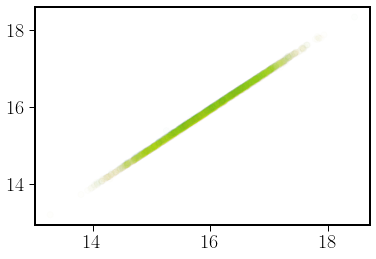

In [85]:
x_par=tab_all['r_band_mag']
y_par=tab_all['RJ_band_mag']
z_par=tab_all['EW_Ha_Re']
plt.scatter(x_par[z_par<-6],y_par[z_par<-6],c=z_par[z_par<-6],alpha=0.01)
#plt.xlim(8,13)
#plt.ylim(8,13)

10243 503


(-0.8, 0.4)

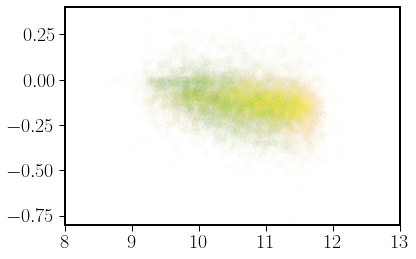

In [86]:
x_par=tab_all['log_Mass']
y_par=tab_all['alpha_ZH_LW_Re_fit']
z_par=tab_all['EW_Ha_Re']
print(len(x_par),len(x_par[y_par==0]))

plt.scatter(x_par[y_par!=0],y_par[y_par!=0],c=z_par[y_par!=0],alpha=0.01)
plt.xlim(8,13)
plt.ylim(-0.8,0.4)

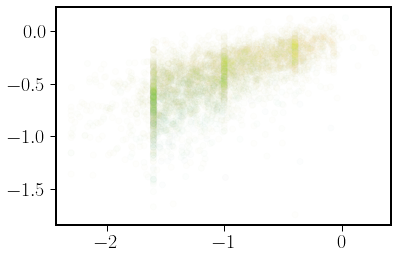

In [87]:
x_par=tab_all['ZH_T30']
y_par=tab_all['ZH_T99']
z_par=tab_all['EW_Ha_Re']
plt.scatter(x_par[z_par<-6],y_par[z_par<-6],c=z_par[z_par<-6],alpha=0.01)
#plt.xlim(8,13)
#plt.ylim(8,13)

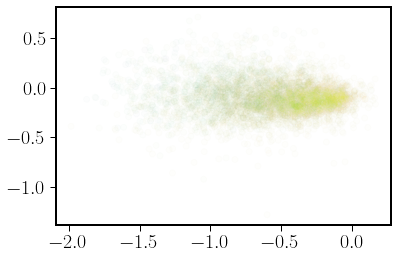

In [88]:
x_par=tab_all['ZH_T90']
y_par=tab_all['a_ZH_T99']
z_par=tab_all['EW_Ha_Re']
plt.scatter(x_par[z_par<-6],y_par[z_par<-6],c=z_par[z_par<-6],alpha=0.01)
#plt.xlim(8,13)
#plt.ylim(8,13)

(8.1, 8.7)

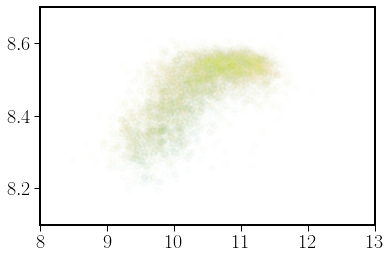

In [43]:
x_par=tab_all['log_Mass']
y_par=tab_all['OH_Mar13_O3N2_Re_fit']
z_par=tab_all['EW_Ha_Re']
plt.scatter(x_par[z_par<-6],y_par[z_par<-6],c=z_par[z_par<-6],alpha=0.01)
plt.xlim(8,13)
plt.ylim(8.1,8.7)

(7.8, 9.2)

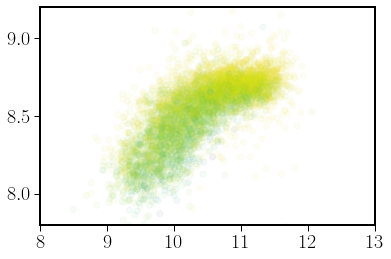

In [44]:
x_par=tab_all['log_Mass']
y_par=tab_all['OH_Ho_Re_fit']
z_par=tab_all['EW_Ha_Re']
#plt.scatter(x_par[z_par<-6],y_par[z_par<-6],c=z_par[z_par<-6],alpha=0.05)
plt.scatter(x_par,y_par,c=z_par,alpha=0.05)
plt.xlim(8,13)
plt.ylim(7.8,9.2)

6824


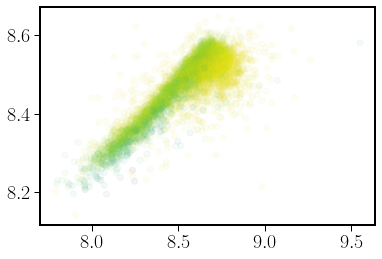

In [45]:
x_par=tab_all['OH_Ho_Re_fit']
y_par=tab_all['OH_Mar13_O3N2_Re_fit']
z_par=tab_all['EW_Ha_Re']
plt.scatter(x_par,y_par,c=z_par,alpha=0.05)
print(len(tab_all['OH_Mar13_O3N2_Re_fit'][~np.isnan(tab_all['OH_Mar13_O3N2_Re_fit'])]))
#plt.scatter(x_par[z_par<-14],y_par[z_par<-14],c=z_par[z_par<-14],alpha=0.05)

#plt.xlim(8,13)
#plt.xlim(8.1,8.7)
#plt.ylim(8.1,8.7)

In [46]:
print(tab_all['Vmax_w'])
#for name in tab_vol['name']:
#    print("|"+name+"|")
#    print(name)
#    print(tab_vol['name'][tab_vol['name']==name])
#tab_all_vol=join(tab_all,tab_vol,keys=['name'],join_type='right')    
#print("... Values of volume added")
#print(tab_all_vol['Vmax_w'])

   Vmax_w  
-----------
 4.2211e-06
 3.7132e-06
1.93554e-06
1.68639e-06
1.93554e-06
8.71277e-06
  7.905e-06
6.45567e-07
 5.6706e-06
2.38905e-06
        ...
1.13259e-05
4.09177e-06
         --
 2.7185e-06
7.29204e-07
1.66874e-06
1.26995e-05
1.26995e-05
2.05023e-06
 8.6621e-08
8.28911e-06
Length = 10243 rows


In [ ]:
list_columns(tab_all.columns,5)

In [ ]:
print(len(tab_all.columns))

In [ ]:
# ********************** 9.12.2021
# Correct ZH_LW_Re
#
#tab_all['ZH_LW_Re_fit']=tab_all['ZH_LW_Re']                   

#
# Defining some new variables
#
tab_all['MgFe'] = np.sqrt(tab_all['Mgb']*(0.72*tab_all['Fe5270']+0.28*tab_all['Fe5335']))

tab_all['Fe']=np.sqrt(tab_all['Fe5270']*tab_all['Fe5335'])
tab_all['OZ_Ho']=tab_all['OH_Ho_Re_fit']-8.67-tab_all['ZH_LW_Re']
tab_all['Mg_Fe']=np.log10(tab_all['Mgb']/tab_all['Fe'])
tab_all['FUV-z']=tab_all['nsa_elpetro_absmag'][:,0]-tab_all['nsa_elpetro_absmag'][:,6]
tab_all['z abs']=tab_all['nsa_elpetro_absmag'][:,6]
tab_all['NUV-z']=tab_all['nsa_elpetro_absmag'][:,1]-tab_all['nsa_elpetro_absmag'][:,6]
tab_all['u-z']=tab_all['nsa_elpetro_absmag'][:,2]-tab_all['nsa_elpetro_absmag'][:,6]
tab_all['u-i nsa']=tab_all['nsa_elpetro_absmag'][:,2]-tab_all['nsa_elpetro_absmag'][:,5]
tab_all['FUV-i']=tab_all['nsa_elpetro_absmag'][:,0]-tab_all['nsa_elpetro_absmag'][:,5]
tab_all['i_abs']=tab_all['nsa_elpetro_absmag'][:,5]
print(tab_all['nsa_elpetro_absmag'][0])
#print(tab_all['nsa_elpetro_absmag'][:,0])
#tab_all.rename_column('z_abs','z abs')
print(np.nanmean(tab_all['z abs']))


In [ ]:
def my_contour(ax,x_cont,y_cont,x_min,x_max,y_min,y_max,c_color='red', title='', nbins=30, zorder=1, linewidths=2,alpha=0.75):
    N_min=2
    Delta=0.3
#    nbins=30
    mask_cont = (x_cont>x_min) & (x_cont<x_max) & (y_cont>y_min) & (y_cont<y_max)  
    x_plt, y_plt = x_cont[mask_cont], y_cont[mask_cont]
    counts, xbins, ybins = np.histogram2d(x_plt, y_plt, bins=nbins,
        normed=True,range=[[x_min,x_max],[y_min,y_max]])
    counts=ndimage.gaussian_filter(counts, sigma=1, order=0)
    counts /= counts.max()
    sum_total=counts.sum()
    vals=[]
    levels=[]
    for idx,cuts in enumerate(np.arange(0.00,1.0,0.01)):
        mask_now= counts>cuts
        levels.append(cuts)
        vals.append(counts[mask_now].sum()/sum_total)
    vals_cont=np.array([0.95,0.65,0.40])
    levels_cont=np.interp(vals_cont,np.array(levels),np.array(vals))
    counts_rot=np.rot90(counts,3)
    xbins=xbins+0.5*(x_max-x_min)/nbins
    ybins=ybins+0.5*(y_max-y_min)/nbins
    flip_counts_rot=np.fliplr(counts_rot)
    p_cont=ax.contour(xbins[0:nbins],ybins[0:nbins],flip_counts_rot,levels_cont,\
                      colors=c_color,alpha=alpha,linewidths=linewidths,zorder=zorder)
#    labels = ['Div Neg', 'Div Pos', 'Rot Neg', 'Rot Pos']
    if (len(title)>0):
        p_cont.collections[0].set_label(title)
    #    h_cont,l_cont = p_cont.legend_elements(title)
#    ax.legend(h_cont, l_cont)

def biweight_midvariance(par):
    val=np.nanstd(par)/np.sqrt(2)
    return val

def my_scatter(ax,x_par,y_par,c_par,x_cont,y_cont,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.85,bin_size=0.3,bin_number=2,c_color="black",c_color2="darksalmon",error=0.05,MC=10, Delta=0.15):
    cm = califa_vel_r
    if (xf_min==0.0):
        xf_min=x_min
    if (yf_min==0.0):
        yf_min=y_min
#    MC=5
#    error=0.05
    N_min=2
#    Delta=0.15
#    den_par_min=0.9
    nbins=30
    lEW_cut=0.78 #0.78
    n_obj_org=len(x_par)
#    print("# N.OBJ = ",n_obj_org)
#    mask = (x_par>x_min) & (x_par<x_max) & (y_par>y_min) & (y_par<y_max)  
    mask = x_par>-20
    n_obj=len(x_par[mask])
#    print(x_par[~mask])
#    print("# N.Obj = ",n_obj,x_min,x_max,y_min,y_max)
    mask_SFGs = mask & (c_par>lEW_cut)
    mask_cont = (x_cont>x_min) & (x_cont<x_max) & (y_cont>y_min) & (y_cont<y_max)  
#
# Density to plot!
#
    x_plt, y_plt = x_cont[mask_cont], y_cont[mask_cont]
#    nbins=40
    counts, xbins, ybins = np.histogram2d(x_plt, y_plt, bins=nbins,
        normed=True,range=[[x_min,x_max],[y_min,y_max]])
#        range=[[np.nanmin(x_plt),np.nanmax(x_plt)],[np.nanmin(y_plt),np.nanmax(y_plt)]])
                                            #    counts /= counts.max()

    counts=ndimage.gaussian_filter(counts, sigma=1, order=0)
    counts /= counts.max()
    sum_total=counts.sum()
    vals=[]
    levels=[]
    for idx,cuts in enumerate(np.arange(0.00,1.0,0.01)):
        mask_now= counts>cuts
        levels.append(cuts)
        vals.append(counts[mask_now].sum()/sum_total)
        #print(idx,levels[idx],vals[idx])
    vals_cont=np.array([0.95,0.80,0.40])
    levels_cont=np.interp(vals_cont,np.array(levels),np.array(vals))
    figure=ax.scatter(x_par, y_par, c=c_par, vmin=c_min,vmax=c_max,alpha=0.4,edgecolor='none',\
                      rasterized=True,cmap=cm)
    counts_rot=np.rot90(counts,3)
    xbins=xbins+0.5*(x_max-x_min)/nbins
    ybins=ybins+0.5*(y_max-y_min)/nbins
    flip_counts_rot=np.fliplr(counts_rot)
    p_cont=ax.contour(xbins[0:nbins],ybins[0:nbins],flip_counts_rot,levels_cont,colors=c_color)

    #
    # Density near a point
    #
    x_plt, y_plt = x_par[mask_SFGs], y_par[mask_SFGs]
    n_sf=len(x_par[mask_SFGs])
    #    nbins=40
    counts, xbins, ybins = np.histogram2d(x_plt, y_plt, bins=nbins,
        normed=True,
        range=[[np.nanmin(x_plt),np.nanmax(x_plt)],[np.nanmin(y_plt),np.nanmax(y_plt)]])
                                            #    counts /= counts.max()
#    print(xbins,ybins)
    counts=ndimage.gaussian_filter(counts, sigma=1, order=0)
    counts /= counts.max()
    sum_total=counts.sum()
    vals_new=[]
    levels_new=[]
    for idx,cuts in enumerate(np.arange(0.00,1.0,0.01)):
        mask_now= counts>cuts
        levels_new.append(cuts)
        vals_new.append(counts[mask_now].sum()/sum_total)
        #print(idx,levels[idx],vals[idx])
    vals_cont=np.array([0.95,0.80,0.40])
    levels_cont=np.interp(vals_cont,np.array(levels_new),np.array(vals))
    
#    figure=ax.scatter(x_par, y_par, c=c_par, vmin=c_min,vmax=c_max,alpha=0.4,edgecolor='none',cmap=cm)
    counts_rot=np.rot90(counts,3)
    xbins=xbins+0.5*(x_max-x_min)/nbins
    ybins=ybins+0.5*(y_max-y_min)/nbins
    flip_counts_rot=np.fliplr(counts_rot)
    
  
    den_par=np.zeros(len(x_par))
    for i in range(len(x_par)):
        if ((np.isfinite(x_par[i])) and (np.isfinite(y_par[i]))):
            i_x=np.argmin(np.abs(xbins-x_par[i]))
            i_y=np.argmin(np.abs(ybins-y_par[i]))
            if ((i_x>0) and (i_x<nbins) and (i_y>0) and (i_y<nbins)):
                den_par[i]=np.interp(counts[i_x,i_y],np.array(levels_new),np.array(vals_new))

# Density plot!
#    figure=ax.scatter(x_par, y_par, c=den_par, vmin=0,vmax=1,alpha=0.4,edgecolor='none',cmap=cm)
    p_cont2=ax.contour(xbins[0:nbins],ybins[0:nbins],flip_counts_rot,levels_cont,colors=c_color2)
#
# We mask low density points
#
#    print("# den_par_min=",den_par_min)
    mask_SFGs = mask_SFGs & (den_par<den_par_min) & \
    np.logical_not(np.isnan(x_par)) & np.isfinite(x_par) & \
    np.logical_not(np.isnan(y_par)) & np.isfinite(y_par)  

    x_sf=x_par[mask_SFGs]
    y_sf=y_par[mask_SFGs]
    
#    figure=ax.scatter(x_par, y_par, c=den_par, vmin=0,vmax=1,alpha=0.4,edgecolor='none',cmap=cm)
    
    bin1 , min1 , max1= Delta,x_min,x_max
    m1, sM1, sD1 = binning_M(x_sf, y_sf, bin1 , min1 , max1, N_min, bin_size, bin_number )
    p1 = ax.errorbar(m1, sM1, yerr= sD1, markersize = 9, markerfacecolor =c_color2, markeredgecolor = 'black', fmt = 'o', ecolor='black', elinewidth = 1, label = '', zorder=2, alpha=0.7)


#    x_sf=x_par[mask_SFGs]
#    y_sf=y_par[mask_SFGs]
    bin1 , min1 , max1= Delta,xf_min,x_max
    funct    = lambda x,a,b: a + b * x
    START=[-1,1.0]
    pa1=np.zeros(2)
    ea1=np.zeros(2)
#    print('#vals to fit =',m1,sM1,sD1)
    if m1.size > 2:
        m1, sM1, sD1 = binning_M(x_sf, y_sf, bin1 , min1 , max1, N_min, 0.3,2 )
        mean_sD1=np.nanmean(sD1)
        sD1=sD1+mean_sD1
        np.clip(sD1,0.5*mean_sD1,1.5*mean_sD1)
        pa1, ea1  = optimize.curve_fit(funct, m1, sM1, sigma=np.sqrt(sD1), p0 = START )
        a_pa=np.zeros((MC,2))
        a_ea=np.zeros((MC,2,2))
        a_rc=np.zeros((MC,2,2))
        for iMC in range(MC):
            e_x_sf=np.abs(2*error-error*(x_sf-x_min)/(x_max-x_min))
            e_y_sf=np.abs(2*error-error*(y_sf-y_min)/(y_max-y_min))
            
#            print('e_y=',e_y_sf,len(e_y_sf))
#            print('e-x=',e_x_sf,len(e_x_sf))
            x_sf_now=x_sf+np.random.normal(loc=0.0,scale=e_x_sf,size=len(e_x_sf))
            y_sf_now=y_sf+np.random.normal(loc=0.0,scale=e_y_sf,size=len(e_y_sf))
            mNOW, sMNOW, sDNOW = binning_M(x_sf_now, y_sf_now, bin1 , min1 , max1, N_min, 0.3,2 )
            rcNOW=np.corrcoef(x_sf_now, y_sf_now)
            #for i in range(len(sDNOW)):
            #    i_x=np.argmin(np.abs(xbins-mNOW[i]))
            #    i_y=np.argmin(np.abs(ybins-sMNOW[i]))
            #    if ((i_x>0) and (i_x<nbins) and (i_y>0) and (i_y<nbins)):
            #        sDNOW[i]=0.5*sDNOW[i]+\
            #        0.1*np.interp(counts[i_x,i_y],np.array(levels_new),np.array(vals_new))
#                    if (iMC==0):
#                        print(mNOW[i],sDNOW[i])
            sDNOW=0.001/sDNOW
    
#            np.clip(sDNOW,0.05,0.2)
            paNOW, eaNOW  = optimize.curve_fit(funct, mNOW, sMNOW, sigma=np.sqrt(sDNOW), p0 = START )
#            print('Coeffs lin fit: ',round(paNOW[0],3),round(np.sqrt(np.diag(eaNOW))[0],3),round(paNOW[1],3),round(np.sqrt(np.diag(eaNOW))[1],3),round(rcNOW[0,1],3))    
            a_pa[iMC,:]=paNOW
            a_ea[iMC,:,:]=eaNOW
            a_rc[iMC,:,:]=rcNOW
#        print(pa1,ea1)
#        test=np.mean(a_pa,axis=(0,1))
#        print(test)
        np.mean(a_pa, axis=(0), out=pa1)
        np.mean(a_ea, axis=(0), out=ea1)
        e_pa1=np.std(a_pa, axis=(0))
        rc=np.mean(a_rc, axis=(0))
        ea1[0,0]=ea1[0,0]+e_pa1[0]
        ea1[1,1]=ea1[1,1]+e_pa1[1]
        
        
        #        pa1=a_pa.mean(axis=(1,2))
#        ea1=a_ea.mean(axis=(1,2))
#        ea1=np.mean(a_ea,axis=2)
        
#        pa1, ea1  = optimize.curve_fit(funct, m1, sM1, sigma=sD1, p0 = START )
#round(pa1[0],3),round(np.sqrt(np.diag(ea1))[0],3),round(pa1[1],3),round(np.sqrt(np.diag(ea1))[1],3),round(rc[0,1],3)

        if (xf_min!=x_min):
            yl_plot=np.linspace(y_min,y_max,10)
            xl_plot=xf_min+0.0*yl_plot
            rect=patches.Rectangle((x_min, y_min), xf_min-x_min, y_max-y_min, facecolor="black", alpha=0.2,zorder=3)
            ax.add_patch(rect)
        x_plot=np.linspace(np.min(m1)-1.5*bin1, np.max(m1)+1.5*bin1, 10)
        y_plot=funct(x_plot,pa1[0],pa1[1])
        p_fit=ax.plot(x_plot, y_plot, '-.', linewidth = 3, markerfacecolor ='black'  , color ='black', zorder=3,label='This work')
#        p_fit=ax.plot(xl_plot, yl_plot, '-', linewidth = 2, markerfacecolor ='grey'  , color ='grey', zorder=2)        
#        print("PASO")

    mask_SFGs = mask_SFGs & (den_par<0.85) & \
    np.logical_not(np.isnan(x_par)) & np.isfinite(x_par) & \
    np.logical_not(np.isnan(y_par)) & np.isfinite(y_par)  

    x_sf=x_par[mask_SFGs]
    y_sf=y_par[mask_SFGs]

    mask_x_sf=x_sf>xf_min
    x_sf=x_sf[mask_x_sf]
    y_sf=y_sf[mask_x_sf]
    rc=np.corrcoef(x_sf, y_sf)
    delta_y_par=y_sf-(pa1[0]+pa1[1]*x_sf)
    s_y_par = biweight_midvariance(y_sf[np.isfinite(y_sf)])
    s_dy_par = biweight_midvariance(delta_y_par[np.isfinite(delta_y_par)])

#    s_y_par = np.std(y_sf[np.isfinite(y_sf)])
#    s_dy_par = np.std(delta_y_par[np.isfinite(delta_y_par)])

    print('Mean Coeff.: ',round(pa1[0],3),round(np.sqrt(np.diag(ea1))[0],3),round(pa1[1],3),round(np.sqrt(np.diag(ea1))[1],3),round(rc[0,1],3),round(s_y_par,3),round(s_dy_par,3),n_obj,n_sf)
    #    print('Stddev: ',round(s_y_par,3),round(s_dy_par,3))
        
    ax.set_xlim([x_min,x_max])
    ax.set_ylim([y_min,y_max])    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.minorticks_on()
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    ax.tick_params(which='both',direction="in")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    return pa1,ea1,s_y_par,s_dy_par,rc

def my_hist(ax,x_par,y_par,x_min,x_max,c_x,c_y,x_label,y_label):
    mask_x = (x_par > x_min) & (x_par < x_max) 
    mask_y = (y_par > x_min) & (y_par < x_max) 
    p1=sns.distplot(x_par[mask_x],bins=40,ax=ax,hist=False,color=c_x)
    p2=sns.distplot(y_par[mask_y],bins=40,ax=ax,hist=False,color=c_y)
    ax.set_xlim([x_min,x_max])
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    return p1,p2

#


In [ ]:
#
# Mass Luminosity Function
#
#logMs_nsa    Num_w        
#ifudsgn      nsa_nsaid    z_obs_nsa    name         
#plateifu     nsaid        Vmax_w            


x_min=7
x_max=12.5
x_par=tab_all['log_Mass'][tab_all['best_type_n']>3]
x_w=tab_all['Vmax_w'][tab_all['best_type_n']>3]#*len(tab_vol)#[tab_all['Vmax_w']>0]
#x_w=x_w.filled(0)
print(np.mean(x_w))
#print(x_w)
c_main='black'
alpha=1.0
n_bins=50
xx = np.linspace(x_min, x_max,n_bins)
kde_xx=stats.gaussian_kde(x_par,weights=x_w)
kde_xx.set_bandwidth(bw_method=kde_xx.factor/3)
max_kde_xx=np.max(kde_xx(xx))
yy=kde_xx(xx)/(2*np.sqrt(np.pi))#/n_bins

hy=np.histogram(x_par,bins=xx,weights=x_w)
hy=np.array(hy)
hy[0]=hy[0]*(n_bins-1)
hx=np.zeros(len(xx)-1)
for indx in range(0,len(hx),1):
    hx[indx]=0.5*(xx[indx]+xx[indx+1])
plt.plot(xx-0.25,log10(yy),color='blue',linewidth=3,alpha=alpha)
plt.plot(hx-0.25,np.log10(hy[0]),color=c_main,linewidth=3,alpha=alpha)
plt.ylim(-6,0)
plt.xlim(7.8,12.2)



#    ax_histx.set_ylim(0,1.1*np.max(kde_xx(xx)))   
#print(np.median(hy[0]))
#print(np.median(yy))
#a=np.median(yy)/np.median(hy[0])
#print(a)

In [ ]:
def plot_2Dhist(x_par=tab_all['z abs'],y_par=tab_all['u-z'],z_par=tab_all['best_type_n'],\
                x_min=-25,x_max=-16,y_min=0,y_max=4.5,z_min=-2,z_max=10,c_main='grey',label='MPL-11',\
                x_label='NSA z-band abs mag',y_label='u-z mag',figname='CMD_diag',alpha=0.75,\
                   size_scatter=5.0,n_zbins=11,labels_zbins=None,color_cm_now='coolwarm_r',z_lim=80,\
               x_loc=0.02,y_loc=0.03,z_label='',reverse=0, xscale='linear', yscale='linear'):

    fig = plt.figure(figsize=(9,7))
    left, width = 0.1, 0.75
    bottom, height = 0.1, 0.75
    spacing = 0.00
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 1-(bottom+height)]
    rect_histy = [left + width + spacing, bottom, 1-(left+width), height]
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    if (color_cm_now is None):
        color_cm_now = vel_map()
        if (reverse==1):
            color_cm_now=color_cm_now.reversed()
    colormap=cm.get_cmap(color_cm_now)


#    colormap = plt.cm(color_cm_now)
    ax.scatter(x_par, y_par, s=size_scatter*3, c=z_par,\
               vmin=z_min,vmax=z_max,alpha=alpha,edgecolor='none',cmap=color_cm_now,\
               rasterized=True,label=label)
    my_contour(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
               nbins=50,title=label,linewidths=3,alpha=alpha)
#
# X-histogram 
#
    
    
    xx = np.linspace(x_min, x_max, 1000)
    kde_xx=stats.gaussian_kde(x_par)
    kde_xx.set_bandwidth(bw_method=kde_xx.factor / 5.)
    max_kde_xx=np.max(kde_xx(xx))
    
    delta_z=(z_max-z_min)/n_zbins
    Ncolors = min(colormap.N,n_zbins)
    mapcolors = [colormap(int(x*colormap.N/Ncolors)) for x in range(Ncolors)]
    if (labels_zbins==None):
        labels_zbins=np.zeros(n_zbins)
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        xx = np.linspace(x_min, x_max, 1000)
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
        if (len(x_par[mask_z_par])>0):
            kde=stats.gaussian_kde(x_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(x_par[mask_z_par])>z_lim):
                ax_histx.plot(xx,max_kde_xx*(kde(xx)/np.max(kde(xx))),\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
    ax_histx.plot(xx,kde_xx(xx),color=c_main,linewidth=3,alpha=alpha)
    ax_histx.set_ylim(0,1.1*np.max(kde_xx(xx)))    
#
# Y-histogram 
#

    yy = np.linspace(y_min, y_max, 1000)
    kde_yy=stats.gaussian_kde(y_par)
    kde_yy.set_bandwidth(bw_method=kde_yy.factor / 2.)
    max_kde_yy=np.max(kde_yy(yy))
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
        #print(z_bins,len(x_par[mask_z_par]))
        if (len(y_par[mask_z_par])>0):
            kde=stats.gaussian_kde(y_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(y_par[mask_z_par])>z_lim):
                ax_histy.plot(max_kde_yy*(kde(yy)/np.max(kde(yy))),yy,\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
    
    
    ax_histy.plot(kde_yy(yy),yy,color=c_main,linewidth=3,alpha=alpha)
    ax_histy.set_xlim(0,1.1*np.max(kde_yy(yy)))

    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    ax_histx.spines['bottom'].set_visible(False)
    ax_histx.spines['left'].set_visible(False)
    ax_histx.get_xaxis().set_visible(False)
    ax_histx.get_yaxis().set_visible(False)

    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    ax_histy.spines['bottom'].set_visible(False)
    ax_histy.spines['left'].set_visible(False)
    ax_histy.get_xaxis().set_visible(False)
    ax_histy.get_yaxis().set_visible(False)

    ax.set_xlabel(x_label, fontsize=23)
    ax.set_ylabel(y_label, fontsize=23)

    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)

    handles, labels = ax_histx.get_legend_handles_labels()
    ax.legend(handles, labels,loc=(x_loc,y_loc),frameon=True,\
              handlelength=1.5,ncol=3,columnspacing=0.15,title=z_label)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    fig.tight_layout()
    fig.savefig(figname+".pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

morph_list=[]
for key, value in morph.items():
    temp = value
    morph_list.append(temp)
    
plot_2Dhist(x_par=tab_all['z abs'],y_par=tab_all['u-z'],z_par=tab_all['best_type_n'],\
            x_min=-25,x_max=-16,y_min=-0.25,y_max=4.5,z_min=-2,z_max=10,c_main='black',label='MPL-11',\
            x_label='NSA z-band abs mag',y_label='u-z mag',figname='CMD_diag',alpha=0.85,\
            size_scatter=5.0,n_zbins=13,z_lim=80,labels_zbins=morph_list,color_cm_now=None,\
            reverse=1)#'Spectral_r')

In [ ]:
mask = tab_all['z_stars']>0
x_par=tab_all['z abs'][mask]
y_par=tab_all['u-z'][mask]
z_par=tab_all['nsa_sersic_n_morph'][mask]
plot_2Dhist(x_par=x_par,y_par=y_par,z_par=z_par,\
            x_min=-25,x_max=-16,y_min=-0.25,y_max=4.5,z_min=0,z_max=6,c_main='black',label='MPL-11',\
            x_label='NSA z-band abs mag',y_label='u-z mag',figname='CMD_nSersic',alpha=0.85,\
            size_scatter=5.0,n_zbins=7,z_lim=80,labels_zbins=None,color_cm_now=None,\
           z_label=r'n$_{\rm sersic}$')#'Spectral_r')

In [ ]:
plot_2Dhist(x_par=tab_all['z_stars'],y_par=tab_all['u-z'],z_par=tab_all['nsa_sersic_n_morph'],\
            x_min=0.0045,x_max=0.17,y_min=-0.25,y_max=4.5,z_min=0,z_max=6,c_main='black',label='MPL-11',\
            x_label='redshift',y_label='u-z mag',figname='abs_z_nSersic',alpha=0.85,\
            size_scatter=5.0,n_zbins=7,z_lim=80,labels_zbins=None,color_cm_now=None,\
           z_label=r'n$_{\rm sersic}$',xscale='log',x_loc=0.55)#'Spectral_r')

In [ ]:
#tab_all['log_Mass'],tab_all['OH_Ho_Re_fit']
x_par=tab_all_select['log_Mass']
y_par=tab_all_select['OH_Ho_Re_fit']
z_par=tab_all_select['best_type_n']
mask_par = (x_par>8) & (x_par<13) & (y_par>7.8) & (y_par<9.1)
plot_2Dhist(x_par=x_par[mask_par],y_par=y_par[mask_par],z_par=z_par[mask_par],\
            x_min=8.5,x_max=12.5,y_min=7.8,y_max=9.1,z_min=-2,z_max=10,c_main='black',label='MPL-11',\
            x_label=r'log(M$_\odot$)',y_label='12+log(O/H) Ho',figname='MZR_Ho',alpha=0.85,\
            size_scatter=5.0,n_zbins=13,z_lim=80,labels_zbins=morph_list,color_cm_now=None,x_loc=0.5)



In [ ]:
#tab_all['log_Mass'],tab_all['OH_Ho_Re_fit']


x_par=tab_all_select['ZH_LW_Re_fit']
y_par=tab_all_select['OZ_Ho']
z_par=tab_all_select['best_type_n']
mask_par = (x_par>-2) & (x_par<0.5) & (y_par>-2) & (y_par<2)
plot_2Dhist(x_par=x_par[mask_par],y_par=y_par[mask_par],z_par=z_par[mask_par],\
            x_min=-1.25,x_max=0.3,y_min=-0.5,y_max=0.85,z_min=-2,z_max=10,c_main='black',label='MPL-11',\
            x_label=r'[Z/H]',y_label=r'[O/Z]',figname='OZ_Ho',alpha=0.85,\
            size_scatter=5.0,n_zbins=13,z_lim=80,labels_zbins=morph_list,color_cm_now=None)



In [ ]:
#tab_all['log_Mass'],tab_all['OH_Ho_Re_fit']
#tab_all['Fe'],tab_all['Mgb']/tab_all['Fe']
x_par=tab_all['OH_Ho_Re_fit']-8.69
y_par=np.log10(tab_all['Mgb'])#/tab_all['Fe'])
z_par=tab_all['best_type_n']
mask_par = (x_par>-0.5) & (x_par<0.75) & (y_par>-0.7) & (y_par<1)
plot_2Dhist(x_par=x_par[mask_par],y_par=y_par[mask_par],z_par=z_par[mask_par],\
            x_min=-0.75,x_max=0.5,y_min=-0.5,y_max=0.85,z_min=-2,z_max=10,c_main='black',label='MPL-11',\
            x_label=r'12+log(O/H)-8.69',y_label=r'log(W$_{Mgb}$)',figname='Mg_Fe',alpha=0.85,\
            size_scatter=5.0,n_zbins=13,z_lim=80,labels_zbins=morph_list,color_cm_now=None)


In [ ]:
#tab_all['log_Mass'],tab_all['OH_Ho_Re_fit']
#tab_all['Fe'],tab_all['Mgb']/tab_all['Fe']
x_par=tab_all['ZH_LW_Re']#tab_all['OH_Ho_Re_fit']-8.69
y_par=1.5*np.log10(tab_all['MgFe'])-0.75
z_par=tab_all['best_type_n']
#[MgFe] =p Mgb (0.72Fe5270 + 0.28Fe5335)

mask_par = (x_par>-1.5) & (x_par<0.75) & (y_par>-1.5) & (y_par<1)
plot_2Dhist(x_par=x_par[mask_par],y_par=y_par[mask_par],z_par=z_par[mask_par],\
            x_min=-1.5,x_max=0.5,y_min=-1.5,y_max=0.5,z_min=-2,z_max=10,c_main='black',label='MPL-11',\
            x_label=r'[Z/H]',y_label=r'log(W$_{Mgb}$)',figname='Mg_Fe',alpha=0.85,\
            size_scatter=5.0,n_zbins=13,z_lim=80,labels_zbins=morph_list,color_cm_now=None)


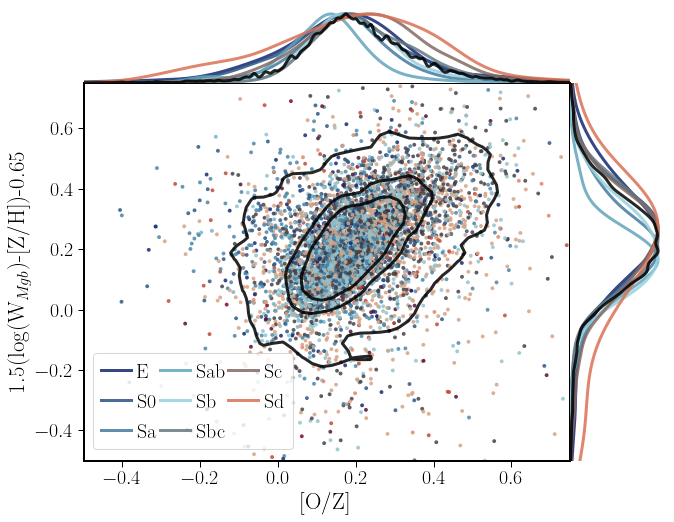

In [168]:
#tab_all['log_Mass'],tab_all['OH_Ho_Re_fit']
#tab_all['Fe'],tab_all['Mgb']/tab_all['Fe']
x_par=tab_all['OZ_Ho']#-(np.log10(tab_all['MgFe']))
y_par=1.5*(np.log10(tab_all['Mgb'])-tab_all['ZH_LW'])-0.65#-(0.75*np.log10(tab_all['MgFe']))
z_par=tab_all['best_type_n']
#[MgFe] =p Mgb (0.72Fe5270 + 0.28Fe5335)

mask_par = (x_par>-1.5) & (x_par<1.5) & (y_par>-1.5) & (y_par<1.5)
plot_2Dhist(x_par=x_par[mask_par],y_par=y_par[mask_par],z_par=z_par[mask_par],\
            x_min=-0.5,x_max=0.75,y_min=-0.5,y_max=0.75,z_min=-2,z_max=10,c_main='black',label='MPL-11',\
            x_label=r'[O/Z]',y_label=r'1.5(log(W$_{Mgb}$)-[Z/H])-0.65',figname='Mg_Fe',alpha=0.85,\
            size_scatter=5.0,n_zbins=13,z_lim=80,labels_zbins=morph_list,color_cm_now=None)

In [ ]:
x_par=np.log10(tab_all['Fe'])
y_par=np.log10(tab_all['Mgb']/tab_all['Fe'])
z_par=tab_all['best_type_n']
mask_par = (x_par>-0.5) & (x_par<0.75) & (y_par>-0.7) & (y_par<1)
plot_2Dhist(x_par=x_par[mask_par],y_par=y_par[mask_par],z_par=z_par[mask_par],\
            x_min=-0.5,x_max=0.75,y_min=-0.5,y_max=0.85,z_min=-2,z_max=10,c_main='black',label='MPL-11',\
            x_label=r'log(W$_{Fe}$)',y_label=r'log(W$_{Mgb}$/W$_{Fe}$)',figname='Mg_Fe',alpha=0.85,\
            size_scatter=5.0,n_zbins=13,z_lim=80,labels_zbins=morph_list,color_cm_now=None)

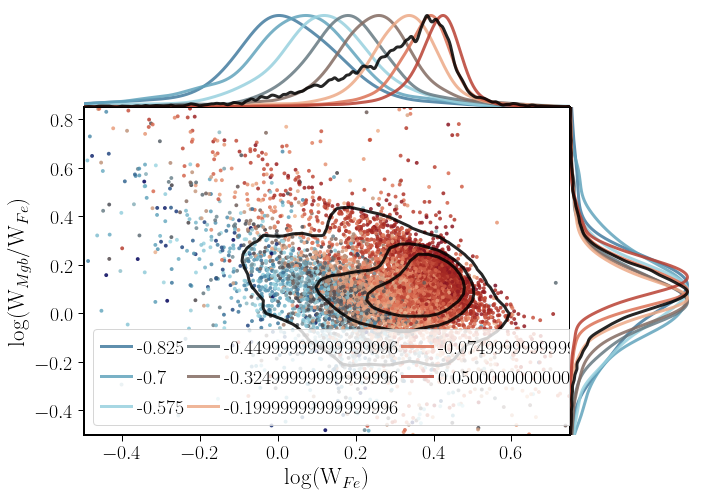

In [23]:
#tab_all['log_Mass'],tab_all['OH_Ho_Re_fit']
#tab_all['Fe'],tab_all['Mgb']/tab_all['Fe']
x_par=np.log10(tab_all['Fe'])
y_par=np.log10(tab_all['Mgb']/tab_all['Fe'])
z_par=tab_all['ZH_LW_Re']
mask_par = (x_par>-0.5) & (x_par<0.75) & (y_par>-0.7) & (y_par<1)
plot_2Dhist(x_par=x_par[mask_par],y_par=y_par[mask_par],z_par=z_par[mask_par],\
            x_min=-0.5,x_max=0.75,y_min=-0.5,y_max=0.85,z_min=-1.2,z_max=0.3,c_main='black',label='MPL-11',\
            x_label=r'log(W$_{Fe}$)',y_label=r'log(W$_{Mgb}$/W$_{Fe}$)',figname='Mgb_Fe_Z',alpha=0.85,\
            size_scatter=5.0,n_zbins=13,z_lim=80,labels_zbins=None,color_cm_now=None)


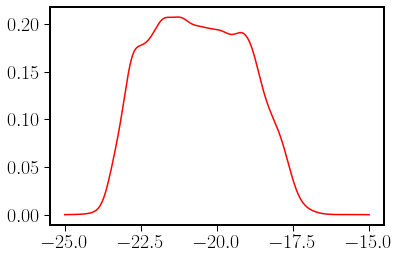

In [22]:
#in_Sigma_Mass_stars  
#plt.scatter(tab_all['i_abs'],tab_all['u-i nsa'],c=tab_all['Age_LW_Re'],alpha=0.01) #flux_Ha6562_Re_fit
#plt.xlim(-25,-13)
#plt.ylim(0,4)
#plt.xlim(8,13)
#rc("text", usetex=False)
#tab_all.rename_column('z_abs','z abs')

#tab_plot=Table([tab_all['name'],tab_all['z abs'],tab_all['u-z'], tab_all['best type_n']])
#df_plot = tab_plot.to_pandas()
#ax=sns.jointplot(data=df_plot,x='log_Mass',y='u-z', xlim=[-0.5,5], ylim=[-0.5,5])
#plt.scatter(x=tab_all['z abs'],y=tab_all['u-z'])#, xlim=[-25,-13], ylim=[-0.5,5],\
#                 alpha=0.01)#
#ax.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
#g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)

xx = np.linspace(-25, -15, 1000)

#kde.set_bandwidth(bw_method='silverman')
kde=stats.gaussian_kde(tab_all['z abs'])
kde.set_bandwidth(bw_method=kde.factor / 10.)
#ax=plt.hist(tab_all['z abs'],range=(-23,-15))
plt.plot(xx,kde(xx),color='r')
#print(kde(xx))
#plt.plot(tab_all['z abs'],stats.gaussian_kde(tab_all['z abs']))
#ax.set_xlim(-30,-10)
#ax.set_axis_labels('x','y')

In [33]:
ax=sns.jointplot(x=tab_all['log_Mass'],y=tab_all['u-z'], xlim=[8,13], ylim=[-0.5,5],\
                 alpha=0.01)#
ax.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)

RuntimeError: latex was not able to process the following string:
b'log_Mass'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/sanchez/.cache/matplotlib/tex.cache/d6cf3f1942e3b860d8f6a05ea8158ede.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
(./d6cf3f1942e3b860d8f6a05ea8158ede.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily log_
                    Mass}
No pages of output.
Transcript written on d6cf3f1942e3b860d8f6a05ea8158ede.log.




RuntimeError: latex was not able to process the following string:
b'log_Mass'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/sanchez/.cache/matplotlib/tex.cache/d6cf3f1942e3b860d8f6a05ea8158ede.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
(./d6cf3f1942e3b860d8f6a05ea8158ede.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily log_
                    Mass}
No pages of output.
Transcript written on d6cf3f1942e3b860d8f6a05ea8158ede.log.




<Figure size 432x432 with 3 Axes>

In [ ]:
#in_Sigma_Mass_stars  
plt.scatter(tab_all['z_abs'],tab_all['FUV-z'],c=tab_all['z_stars'],alpha=0.1) #flux_Ha6562_Re_fit
plt.xlim(-25,-13)
plt.ylim(0,10)
#plt.xlim(8,13)

In [ ]:
#in_Sigma_Mass_stars  
plt.scatter(tab_all['z_abs'],tab_all['u-z'],c=tab_all['Age_LW_Re'],alpha=0.01) #flux_Ha6562_Re_fit
plt.xlim(-25,-13)
plt.ylim(0,4)
#plt.xlim(8,13)

In [ ]:
#in_Sigma_Mass_stars  
plt.scatter(tab_all['i_abs'],tab_all['u-i nsa'],c=tab_all['Age_LW_Re'],alpha=0.01) #flux_Ha6562_Re_fit
plt.xlim(-25,-13)
plt.ylim(0,4)
#plt.xlim(8,13)

In [ ]:
#in_Sigma_Mass_stars  
plt.scatter(tab_all['u-i nsa'],tab_all['u-i'],c=tab_all['z_stars'],alpha=0.1,edgecolor='None') #flux_Ha6562_Re_fit
#plt.xlim(-25,-13)
plt.xlim(0,4)
plt.ylim(0,4)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
#plt.xlim(8,13)

In [ ]:
#in_Sigma_Mass_stars  tab_mag['i_band_mag']
plt.scatter(tab_all['i_abs'],tab_all['i_band_abs_mag'],c=tab_all['z_stars'],alpha=0.1,edgecolor='None') #flux_Ha6562_Re_fit
plt.xlim(-25,-13)
plt.ylim(-25,-13)
#plt.xlim(0,4)
#plt.ylim(0,4)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
#plt.xlim(8,13)

In [ ]:
#in_Sigma_Mass_stars  
plt.scatter(tab_all['log_Mass'],tab_all['in_Sigma_Mass_stars'],c=tab_all['z_stars'],alpha=0.1) #flux_Ha6562_Re_fit
plt.xlim(8,13)

In [ ]:
#list_columns(tab_all.columns)
plt.scatter(tab_all['flux_Halpha6562.85_Re_fit'],tab_all['flux_Ha6562_Re_fit']) #flux_Ha6562_Re_fit

In [ ]:
#list_columns(tab_all.columns) #OH_Pet04_O3N2_alpha_fit
plt.scatter(tab_all['log_Mass'],tab_all['OH_Mar13_O3N2_alpha_fit'],alpha=0.1) #flux_Ha6562_Re_fit
plt.xlim(8,13)
print(np.nanmean(tab_all['OH_Pet04_O3N2_alpha_fit']))

In [ ]:
#list_columns(tab_all.columns) #OH_Pet04_O3N2_alpha_fit
plt.scatter(tab_all['log_Mass'],tab_all['OH_Ho_Re_fit'],c=tab_all['z_stars'],alpha=0.1) #flux_Ha6562_Re_fit
plt.xlim(8,13)
print(np.nanmean(tab_all['OH_Pet04_O3N2_alpha_fit']))

(8.0, 13.0)

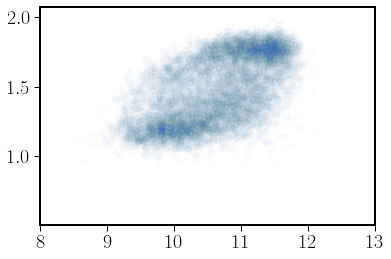

In [32]:
#list_columns(tab_all.columns) #OH_Pet04_O3N2_alpha_fit
plt.scatter(tab_all['log_Mass'],tab_all['D4000_Re_fit'],alpha=0.01) #flux_Ha6562_Re_fit
plt.xlim(8,13)
#print(np.nanmean(tab_all['OH_Pet04_O3N2_alpha_fit']))

In [ ]:
#list_columns(tab_all.columns) #OH_Pet04_O3N2_alpha_fit
plt.scatter(tab_all['log_Mass'],tab_all['Mgb_Re_fit'],alpha=0.1) #flux_Ha6562_Re_fit
plt.xlim(8,13)
#print(np.nanmean(tab_all['OH_Pet04_O3N2_alpha_fit']))

In [ ]:
#list_columns(tab_all.columns) #OH_Pet04_O3N2_alpha_fit
plt.scatter(tab_all['Mgb'],tab_all['Mgb_Re_fit'],alpha=0.1) #flux_Ha6562_Re_fit
plt.xlim(-5,15)
plt.ylim(-5,15)

#print(np.nanmean(tab_all['OH_Pet04_O3N2_alpha_fit']))

(-5.0, 10.0)

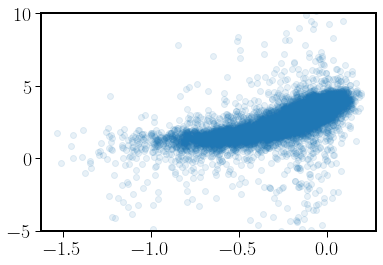

In [25]:
#list_columns(tab_all.columns) #OH_Pet04_O3N2_alpha_fit
plt.scatter(tab_all['ZH_LW_Re'],tab_all['Mgb'],alpha=0.1) #flux_Ha6562_Re_fit
#plt.xlim(-2,0.5)
plt.ylim(-5,10)
#print(np.nanmean(tab_all['OH_Pet04_O3N2_alpha_fit']))

(-1.0, 5.0)

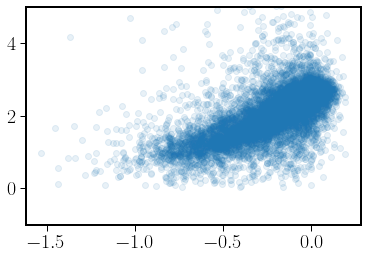

In [30]:
#e_Hd        Fe5270      e_e4000     SN          
#Hb          e_Fe5270    Hdmod       e_SN        
#e_Hb        Fe5335      e_Hdmod           

#list_columns(tab_all.columns) #OH_Pet04_O3N2_alpha_fit
tab_all['Fe']=np.sqrt(tab_all['Fe5270']*tab_all['Fe5335'])
plt.scatter(tab_all['ZH_LW_Re'],tab_all['Fe'],alpha=0.1) #flux_Ha6562_Re_fit
#plt.xlim(-2,0.5)
plt.ylim(-1,5)
#print(np.nanmean(tab_all['OH_Pet04_O3N2_alpha_fit']))

In [ ]:
plt.scatter(tab_all['ZH_MW_Re_fit'],tab_all['Fe'],alpha=0.1) #flux_Ha6562_Re_fit
plt.ylim(-1,5)

(-3.0, 10.0)

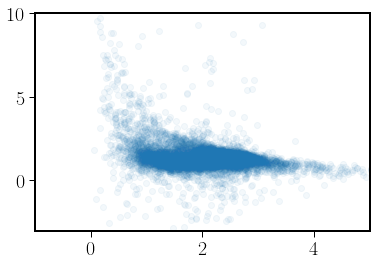

In [26]:
plt.scatter(tab_all['Fe'],tab_all['Mgb']/tab_all['Fe'],alpha=0.05) #flux_Ha6562_Re_fit
plt.xlim(-1,5)
plt.ylim(-3,10)


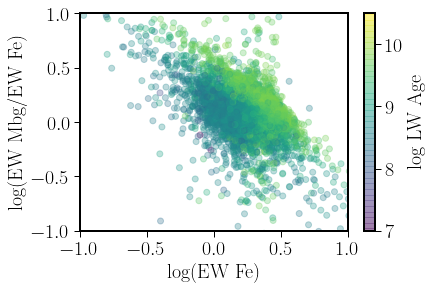

In [27]:
cs=plt.scatter(np.log10(tab_all['Fe']),np.log10(tab_all['Mgb']/tab_all['Fe']),\
            c=tab_all['Age_LW_Re'],alpha=0.3,vmin=7,vmax=10.5) 
#flux_Ha6562_Re_fit
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel(r'log(EW Fe)')
plt.ylabel(r'log(EW Mbg/EW Fe)')
plt.colorbar(cs,label='log LW Age')


(-0.5, 1.0)

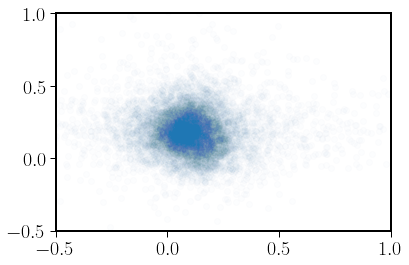

In [28]:
tab_all['OZ_Ho']=tab_all['OH_Ho_Re_fit']-8.67-tab_all['ZH_LW_Re']
tab_all['Mg_Fe']=np.log10(tab_all['Mgb']/tab_all['Fe'])
plt.scatter(tab_all['Mg_Fe'],tab_all['OZ_Ho'],alpha=0.01)
plt.xlim(-0.5,1)
plt.ylim(-0.5,1)


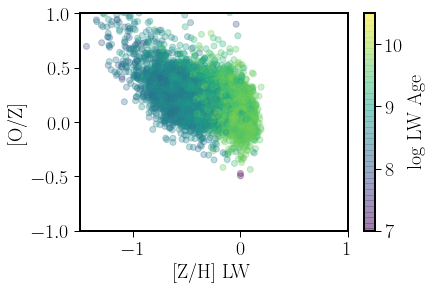

In [29]:
cs=plt.scatter(tab_all['ZH_LW_Re'],tab_all['OZ_Ho'],\
            c=tab_all['Age_LW_Re'],alpha=0.3,vmin=7,vmax=10.5) 
#flux_Ha6562_Re_fit
plt.xlim(-1.5,1)
plt.ylim(-1,1)
plt.xlabel(r'[Z/H] LW')
plt.ylabel(r'[O/Z]')
plt.colorbar(cs,label='log LW Age')


In [ ]:
print(tab_all['nsa_sersic_n_morph'])

In [ ]:
plt.scatter(tab_all['i_band_abs_mag'],tab_all['u-i'],alpha=0.1,edgecolor=None)
plt.xlim(-25.5,-15)
plt.ylim(-0.5,3.5)
print(len(tab_all))
#print(len(tab_mag))


In [ ]:
plt.scatter(tab_all['best type_n'],tab_all['u-i'],alpha=0.1,edgecolor=None)
print(np.min(tab_all['best type_n']))
print(np.max(tab_all['best type_n']))
#print(tab_all['best type_n'])
#plt.xlim(-25.5,-15)
#plt.ylim(-0.5,3.5)
#print(len(tab_all))
#print(len(tab_mag))


In [ ]:
plt.scatter(tab_all['best type_n'],tab_all['nsa_sersic_n_morph'],alpha=0.1,edgecolor=None)
#print(np.min(tab_all['best type_n']))
#print(np.max(tab_all['best type_n']))
#print(tab_all['best type_n'])
#plt.xlim(-25.5,-15)
#plt.ylim(-0.5,3.5)
#print(len(tab_all))
#print(len(tab_mag))
#print(tab_all['nsa_sersic_n'])

In [ ]:
plt.scatter(tab_all['best type_n'],tab_all['lSFR']-tab_all['log_Mass'],alpha=0.1,edgecolor=None)
#print(np.mean(tab_all['log_Mass']))